In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

pd.set_option('display.max_columns',None)

In [2]:
df = pd.read_csv('008_house_data.csv')
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     2Story            7            5       2003   
1          Norm     1Fam     1Story            6            8       1976   
2          Norm     1Fam     2Story            7            5       2001   
3          Norm     1Fam     2Story            7            5       1915   
4          Norm     1Fam     2Story            8            5       2000   
...         ...      ...        ...          ...          ...        ...   
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
1455          2000     Gable  CompShg     VinylSd     VinylSd        NaN   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd        NaN   
1458          1996       Hip  CompShg     MetalSd     MetalSd        NaN   
1459          1965     Gable  CompShg     HdBoard     HdBoard        NaN   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          196.0        Gd        TA      PConc       Gd       TA   
1            0.0        TA        TA     CBlock       Gd       TA   
2          162.0        Gd        TA      PConc       Gd       TA   
3            0.0        TA        TA     BrkTil       TA       Gd   

In [3]:
df.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
5         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
6         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
7         Lvl    AllPub    Corner       Gtl       NWAmes       PosN   
8         Lvl    AllPub    Inside       Gtl      OldTown     Artery   
9         Lvl    AllPub    Corner       Gtl      BrkSide     Artery   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   
5       Norm     1Fam     1.5Fin            5            5       1993   
6       Norm     1Fam     1Story            8            5       2004   
7       Norm     1Fam     2Story            7            6       1973   
8       Norm     1Fam     1.5Fin            7            5       1931   
9     Artery   2fmCon     1.5Unf            5            6       1939   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
5          1995     Gable  CompShg     VinylSd     VinylSd        NaN   
6          2005     Gable  CompShg     VinylSd     VinylSd      Stone   
7          1973     Gable  CompShg     HdBoard     HdBoard      Stone   
8          1950     Gable  CompShg     BrkFace     Wd Shng        NaN   
9          1950     Gable  CompShg     MetalSd     MetalSd        NaN   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   
5         0.0        TA        TA       Wood       Gd       TA           No   
6       186.0        Gd        TA      PConc       Ex       TA           Av   
7       240.0        TA        TA     CBlock       Gd       TA           Mn   
8         0.0        TA        TA     BrkTil       TA       TA           No   
9       

In [4]:
df.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1455          2000     Gable  CompShg     VinylSd     VinylSd        NaN   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd        NaN   
1458          1996       Hip  CompShg     MetalSd     MetalSd        NaN   
1459          1965     Gable  CompShg     HdBoard     HdBoard        NaN   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1455         0.0        TA        TA      PConc       Gd       TA   
1456       119.0        TA        TA     CBlock       Gd       TA   
1457         0.0        Ex        Gd      Stone       TA       Gd   
1458         0.0        TA        TA     CBlock       TA       TA   
1459         0.0        Gd        TA     CBlock       TA       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1455           No          Unf           0          Unf           0   
1456           No          ALQ         790          Rec         163   
1457           No          GLQ         275          Unf           0   
1458           Mn          GLQ          49          Rec        1029   
1459           No          BLQ         830          LwQ         290   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1455        953          953    GasA        Ex          Y      SBrkr   
1456        589         1542    GasA        TA          Y      SBrkr   
1457        877         1152    GasA        Ex          Y      SBrkr   
1458          0         1078    GasA        Gd          Y      FuseA   
1459        136         1256    GasA        Gd          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1455       953       694             0       1647             0             0   
1456      2073         0             0       2073             1             0   
1457      1188      1152             0       2340             0             0   
1458      1078         0             0       1078             1             0   
1459      1256         0             0       1256             1             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1455         2         1             3             1          TA   
1456         2         0             3             1          TA   
1457         2         0             4             1          Gd   
1458         1         0             2             1          Gd   
1459         1         1             3             1          TA   

   

In [5]:
df.shape

(1460, 81)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [8]:
df.isnull().sum().sum()

7829

In [9]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [10]:
print('total number of duplicate values : ',df.duplicated().sum())

total number of duplicate values :  0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [12]:
df['LotFrontage'].mean()

70.04995836802665

In [13]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [14]:
df['Alley'].value_counts()

Alley
Grvl    50
Pave    41
Name: count, dtype: int64

In [15]:
df.drop('Alley',axis=1,inplace=True)
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0        1          60       RL         65.0     8450   Pave      Reg   
1        2          20       RL         80.0     9600   Pave      Reg   
2        3          60       RL         68.0    11250   Pave      IR1   
3        4          70       RL         60.0     9550   Pave      IR1   
4        5          60       RL         84.0    14260   Pave      IR1   
...    ...         ...      ...          ...      ...    ...      ...   
1455  1456          60       RL         62.0     7917   Pave      Reg   
1456  1457          20       RL         85.0    13175   Pave      Reg   
1457  1458          70       RL         66.0     9042   Pave      Reg   
1458  1459          20       RL         68.0     9717   Pave      Reg   
1459  1460          20       RL         75.0     9937   Pave      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     2Story            7            5       2003   
1          Norm     1Fam     1Story            6            8       1976   
2          Norm     1Fam     2Story            7            5       2001   
3          Norm     1Fam     2Story            7            5       1915   
4          Norm     1Fam     2Story            8            5       2000   
...         ...      ...        ...          ...          ...        ...   
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
1455          2000     Gable  CompShg     VinylSd     VinylSd        NaN   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd        NaN   
1458          1996       Hip  CompShg     MetalSd     MetalSd        NaN   
1459          1965     Gable  CompShg     HdBoard     HdBoard        NaN   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          196.0        Gd        TA      PConc       Gd       TA   
1            0.0        TA        TA     CBlock       Gd       TA   
2          162.0        Gd        TA      PConc       Gd       TA   
3            0.0        TA        TA     BrkTil       TA       Gd   
4          350.0        Gd        TA      PConc       Gd       TA   
..

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [17]:
j = 0
for i in df.columns:
    if (df[i].dtype == 'object' and df[i].isna().sum() != 0):
        print(j+1,'. ',i ,df[i].dtype ,df[i].isna().sum())
        j=j+1 
print('\nTotal Features: ', j)

1 .  MasVnrType object 872
2 .  BsmtQual object 37
3 .  BsmtCond object 37
4 .  BsmtExposure object 38
5 .  BsmtFinType1 object 37
6 .  BsmtFinType2 object 38
7 .  Electrical object 1
8 .  FireplaceQu object 690
9 .  GarageType object 81
10 .  GarageFinish object 81
11 .  GarageQual object 81
12 .  GarageCond object 81
13 .  PoolQC object 1453
14 .  Fence object 1179
15 .  MiscFeature object 1406

Total Features:  15


In [18]:
df.drop(['MasVnrType','Fence','PoolQC','FireplaceQu','MiscFeature'], axis=1 ,inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [20]:
j = 0
for i in df.columns:
    if (df[i].dtype == 'object' and df[i].isna().sum() != 0):
        print(j+1,'. ',i ,df[i].dtype ,df[i].isna().sum())
        j=j+1 
print('\nTotal Features: ', j)

1 .  BsmtQual object 37
2 .  BsmtCond object 37
3 .  BsmtExposure object 38
4 .  BsmtFinType1 object 37
5 .  BsmtFinType2 object 38
6 .  Electrical object 1
7 .  GarageType object 81
8 .  GarageFinish object 81
9 .  GarageQual object 81
10 .  GarageCond object 81

Total Features:  10


In [21]:
df.dropna(subset='BsmtQual', axis=0 ,inplace=True)   # default axis = 0 

In [22]:
df.dropna(subset='BsmtExposure',inplace=True) 

In [23]:
df.dropna(subset='BsmtFinType2',inplace=True) 

In [24]:
df.dropna(subset='Electrical',inplace=True) 

In [25]:
df.dropna(subset='GarageType',inplace=True) 

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1346 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1346 non-null   int64  
 1   MSSubClass     1346 non-null   int64  
 2   MSZoning       1346 non-null   object 
 3   LotFrontage    1346 non-null   float64
 4   LotArea        1346 non-null   int64  
 5   Street         1346 non-null   object 
 6   LotShape       1346 non-null   object 
 7   LandContour    1346 non-null   object 
 8   Utilities      1346 non-null   object 
 9   LotConfig      1346 non-null   object 
 10  LandSlope      1346 non-null   object 
 11  Neighborhood   1346 non-null   object 
 12  Condition1     1346 non-null   object 
 13  Condition2     1346 non-null   object 
 14  BldgType       1346 non-null   object 
 15  HouseStyle     1346 non-null   object 
 16  OverallQual    1346 non-null   int64  
 17  OverallCond    1346 non-null   int64  
 18  YearBuilt    

In [27]:
j = 0
for i in df.columns:
    if (df[i].dtype == 'int64' and df[i].isna().sum() != 0):
        print(j+1,'. ',i ,df[i].dtype ,df[i].isna().sum())
        j=j+1 
print('\nTotal Features: ', j)


Total Features:  0


In [28]:
j = 0
for i in df.columns:
    if (df[i].dtype == 'float64' and df[i].isna().sum() != 0):
        print(j+1,'. ',i ,df[i].dtype ,df[i].isna().sum())
        j=j+1 
print('\nTotal Features: ', j)

1 .  MasVnrArea float64 8

Total Features:  1


In [29]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mean())

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1346 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1346 non-null   int64  
 1   MSSubClass     1346 non-null   int64  
 2   MSZoning       1346 non-null   object 
 3   LotFrontage    1346 non-null   float64
 4   LotArea        1346 non-null   int64  
 5   Street         1346 non-null   object 
 6   LotShape       1346 non-null   object 
 7   LandContour    1346 non-null   object 
 8   Utilities      1346 non-null   object 
 9   LotConfig      1346 non-null   object 
 10  LandSlope      1346 non-null   object 
 11  Neighborhood   1346 non-null   object 
 12  Condition1     1346 non-null   object 
 13  Condition2     1346 non-null   object 
 14  BldgType       1346 non-null   object 
 15  HouseStyle     1346 non-null   object 
 16  OverallQual    1346 non-null   int64  
 17  OverallCond    1346 non-null   int64  
 18  YearBuilt    

In [31]:
j = 0
for i in df.columns:
    if (df[i].dtype == 'int64' and (df[i]==0).sum()!=0):
        print(j+1,'. ',i ,df[i].dtype ,(df[i]==0).sum())
        j=j+1 
print('\nTotal Features: ', j)

1 .  BsmtFinSF1 int64 394
2 .  BsmtFinSF2 int64 1184
3 .  BsmtUnfSF int64 73
4 .  2ndFlrSF int64 753
5 .  LowQualFinSF int64 1328
6 .  BsmtFullBath int64 766
7 .  BsmtHalfBath int64 1266
8 .  FullBath int64 8
9 .  HalfBath int64 811
10 .  BedroomAbvGr int64 6
11 .  Fireplaces int64 595
12 .  WoodDeckSF int64 675
13 .  OpenPorchSF int64 575
14 .  EnclosedPorch int64 1162
15 .  3SsnPorch int64 1323
16 .  ScreenPorch int64 1230
17 .  PoolArea int64 1339
18 .  MiscVal int64 1299

Total Features:  18


In [32]:
df.drop(['MiscVal','PoolArea','ScreenPorch','3SsnPorch','EnclosedPorch',
              'BsmtFinSF2','LowQualFinSF','BsmtHalfBath','HalfBath'],axis=1,inplace=True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1346 entries, 0 to 1459
Data columns (total 66 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1346 non-null   int64  
 1   MSSubClass     1346 non-null   int64  
 2   MSZoning       1346 non-null   object 
 3   LotFrontage    1346 non-null   float64
 4   LotArea        1346 non-null   int64  
 5   Street         1346 non-null   object 
 6   LotShape       1346 non-null   object 
 7   LandContour    1346 non-null   object 
 8   Utilities      1346 non-null   object 
 9   LotConfig      1346 non-null   object 
 10  LandSlope      1346 non-null   object 
 11  Neighborhood   1346 non-null   object 
 12  Condition1     1346 non-null   object 
 13  Condition2     1346 non-null   object 
 14  BldgType       1346 non-null   object 
 15  HouseStyle     1346 non-null   object 
 16  OverallQual    1346 non-null   int64  
 17  OverallCond    1346 non-null   int64  
 18  YearBuilt    

In [34]:
j = 0
for i in df.columns:
    if (df[i].dtype == 'int64' and (df[i]==0).sum()!=0):
        print(j+1,'. ',i ,df[i].dtype ,(df[i]==0).sum())
        j=j+1 
print('\nTotal Features: ', j)

1 .  BsmtFinSF1 int64 394
2 .  BsmtUnfSF int64 73
3 .  2ndFlrSF int64 753
4 .  BsmtFullBath int64 766
5 .  FullBath int64 8
6 .  BedroomAbvGr int64 6
7 .  Fireplaces int64 595
8 .  WoodDeckSF int64 675
9 .  OpenPorchSF int64 575

Total Features:  9


In [35]:
df['BsmtFinSF1'].mean()

465.9130757800892

In [36]:
# this will fill all zero value mentioned in above columns
columns = ['BsmtFinSF1','BsmtUnfSF','2ndFlrSF','BsmtFullBath','FullBath',
          'BedroomAbvGr','Fireplaces','WoodDeckSF','OpenPorchSF']
for column in columns:
    df[column] = df[column].replace(0,df[column].mean())

In [37]:
j = 0
for i in df.columns:
    if (df[i].dtype == 'int64' and (df[i]==0).sum()!=0):
        print(j+1,'. ',i ,df[i].dtype ,(df[i]==0).sum())
        j=j+1 
print('\nTotal Features: ', j)


Total Features:  0


In [38]:
j = 0
for i in df.columns:
    if (df[i].dtype == 'float64' and (df[i]==0).sum()!=0):
        print(j+1,'. ',i ,df[i].dtype ,(df[i]==0).sum())
        j=j+1 
print('\nTotal Features: ', j)

1 .  MasVnrArea float64 760

Total Features:  1


In [39]:
df['MasVnrArea'] = df['MasVnrArea'].replace(0,df['MasVnrArea'].mean())

In [40]:
j = 0
for i in df.columns:
    if (df[i].dtype == 'float64' and (df[i]==0).sum()!=0):
        print(j+1,'. ',i ,df[i].dtype ,(df[i]==0).sum())
        j=j+1 
print('\nTotal Features: ', j)


Total Features:  0


In [41]:
j = 0
for i in df.columns:
    if (df[i].dtype == 'object'):
        print(j+1,'. ',i ,df[i].dtype)
        j=j+1 
print('\nTotal Features: ', j)

1 .  MSZoning object
2 .  Street object
3 .  LotShape object
4 .  LandContour object
5 .  Utilities object
6 .  LotConfig object
7 .  LandSlope object
8 .  Neighborhood object
9 .  Condition1 object
10 .  Condition2 object
11 .  BldgType object
12 .  HouseStyle object
13 .  RoofStyle object
14 .  RoofMatl object
15 .  Exterior1st object
16 .  Exterior2nd object
17 .  ExterQual object
18 .  ExterCond object
19 .  Foundation object
20 .  BsmtQual object
21 .  BsmtCond object
22 .  BsmtExposure object
23 .  BsmtFinType1 object
24 .  BsmtFinType2 object
25 .  Heating object
26 .  HeatingQC object
27 .  CentralAir object
28 .  Electrical object
29 .  KitchenQual object
30 .  Functional object
31 .  GarageType object
32 .  GarageFinish object
33 .  GarageQual object
34 .  GarageCond object
35 .  PavedDrive object
36 .  SaleType object
37 .  SaleCondition object

Total Features:  37


In [42]:
for i in df.columns:
    if (df[i].dtype == 'object'):
        print(df[i].value_counts())
        print()

MSZoning
RL         1071
RM          191
FV           65
RH           11
C (all)       8
Name: count, dtype: int64

Street
Pave    1341
Grvl       5
Name: count, dtype: int64

LotShape
Reg    835
IR1    461
IR2     40
IR3     10
Name: count, dtype: int64

LandContour
Lvl    1214
Bnk      52
HLS      48
Low      32
Name: count, dtype: int64

Utilities
AllPub    1345
NoSeWa       1
Name: count, dtype: int64

LotConfig
Inside     963
Corner     245
CulDSac     91
FR2         43
FR3          4
Name: count, dtype: int64

LandSlope
Gtl    1273
Mod      61
Sev      12
Name: count, dtype: int64

Neighborhood
NAmes      209
CollgCr    147
OldTown    100
Somerst     86
Gilbert     78
NridgHt     76
NWAmes      73
Edwards     70
Sawyer      69
SawyerW     54
Crawfor     51
BrkSide     47
Mitchel     42
NoRidge     41
Timber      37
IDOTRR      29
ClearCr     26
StoneBr     25
SWISU       20
Blmngtn     17
BrDale      15
MeadowV     12
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtyp

In [43]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()

In [44]:
for i in df.columns: 
    if df[i].dtype == 'object' : 
        df[i] = le.fit_transform(df[i])
        print(i,df[i].value_counts())

MSZoning MSZoning
3    1071
4     191
1      65
2      11
0       8
Name: count, dtype: int64
Street Street
1    1341
0       5
Name: count, dtype: int64
LotShape LotShape
3    835
0    461
1     40
2     10
Name: count, dtype: int64
LandContour LandContour
3    1214
0      52
1      48
2      32
Name: count, dtype: int64
Utilities Utilities
0    1345
1       1
Name: count, dtype: int64
LotConfig LotConfig
4    963
0    245
1     91
2     43
3      4
Name: count, dtype: int64
LandSlope LandSlope
0    1273
1      61
2      12
Name: count, dtype: int64
Neighborhood Neighborhood
12    209
5     147
17    100
21     86
8      78
16     76
14     73
7      70
19     69
20     54
6      51
3      47
11     42
15     41
23     37
9      29
4      26
22     25
18     20
0      17
2      15
10     12
24     11
13      9
1       2
Name: count, dtype: int64
Condition1 Condition1
2    1170
1      63
0      43
6      26
4      19
5      10
3       8
8       5
7       2
Name: count, dtype: int64
Con

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1346 entries, 0 to 1459
Data columns (total 66 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1346 non-null   int64  
 1   MSSubClass     1346 non-null   int64  
 2   MSZoning       1346 non-null   int32  
 3   LotFrontage    1346 non-null   float64
 4   LotArea        1346 non-null   int64  
 5   Street         1346 non-null   int32  
 6   LotShape       1346 non-null   int32  
 7   LandContour    1346 non-null   int32  
 8   Utilities      1346 non-null   int32  
 9   LotConfig      1346 non-null   int32  
 10  LandSlope      1346 non-null   int32  
 11  Neighborhood   1346 non-null   int32  
 12  Condition1     1346 non-null   int32  
 13  Condition2     1346 non-null   int32  
 14  BldgType       1346 non-null   int32  
 15  HouseStyle     1346 non-null   int32  
 16  OverallQual    1346 non-null   int64  
 17  OverallCond    1346 non-null   int64  
 18  YearBuilt    

In [46]:
df.isna().sum().sum()

0

In [47]:
df.shape

(1346, 66)

In [48]:
correlation = df.corr()
correlation

Id  MSSubClass  MSZoning  LotFrontage   LotArea  \
Id             1.000000    0.016151 -0.009639    -0.011789 -0.036507   
MSSubClass     0.016151    1.000000  0.017811    -0.360201 -0.135995   
MSZoning      -0.009639    0.017811  1.000000    -0.088991 -0.023951   
LotFrontage   -0.011789   -0.360201 -0.088991     1.000000  0.299898   
LotArea       -0.036507   -0.135995 -0.023951     0.299898  1.000000   
...                 ...         ...       ...          ...       ...   
MoSold         0.023310   -0.015948 -0.019094     0.014158 -0.001991   
YrSold         0.000018   -0.021460 -0.022157     0.010726 -0.013415   
SaleType       0.013126    0.010772  0.095048    -0.024890  0.014859   
SaleCondition  0.001819   -0.010778 -0.008889     0.046891  0.028344   
SalePrice     -0.026857   -0.081120 -0.162067     0.329520  0.253854   

                 Street  LotShape  LandContour  Utilities  LotConfig  \
Id             0.006110  0.034822    -0.014571   0.013790   0.062671   
MSSubClass    -0.020624  0.099092     0.004291  -0.023882   0.064806   
MSZoning       0.098863  0.056129    -0.026716  -0.000837  -0.018868   
LotFrontage   -0.034653 -0.132124    -0.071211  -0.000732  -0.169329   
LotArea       -0.214624 -0.163527    -0.168455   0.009667  -0.122189   
...                 ...       ...          ...        ...        ...   
MoSold        -0.001450 -0.043293    -0.018705  -0.053831   0.015179   
YrSold        -0.036469  0.033646     0.018702   0.024490  -0.006659   
SaleType       0.019299 -0.007536    -0.027785  -0.129632   0.008239   
SaleCondition  0.011925 -0.030437     0.006286  -0.098010   0.060510   
SalePrice      0.042129 -0.248841     0.002661  -0.017098  -0.063082   

               LandSlope  Neighborhood  Condition1  Condition2  BldgType  \
Id              0.005319     -0.010911   -0.016136   -0.002415  0.017197   
MSSubClass     -0.012166     -0.020087   -0.029526   -0.045312  0.754481   
MSZoning       -0.019742     -0.268672   -0.031208    0.034085 -0.005298   
LotFrontage     0.060073      0.078528   -0.009034    0.006750 -0.414011   
LotArea         0.456997      0.042144    0.018922    0.021190 -0.204949   
...                  ...           ...         ...         ...       ...   
MoSold          0.021256      0.012778   -0.009593    0.007823 -0.031142   
YrSold         -0.001043      0.036972   -0.018487   -0.019748 -0.001441   
SaleType        0.055385     -0.036397   -0.001809   -0.002600 -0.045503   
SaleCondition  -0.059615      0.019589    0.050574    0.037944  0.008915   
SalePrice       0.060469      0.198874    0.074444    0.001748 -0.082262   

               HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
Id               0.004022    -0.039462     0.011370  -0.021007     -0.026053   
MSSubClass       0.400271     0.049656    -0.095711   0.055890      0.038156   
MSZoning        -0.116334    -0.174365     0.189015  -0.328944     -0.183759   
LotFrontage      0.044339     0.227328    -0.042914   0.102615      0.077934   
LotArea         -0.036611     0.089829    -0.002186  -0.006590      0.000184   
...                   ...          ...          ...        ...           ...   
MoSold           0.025308     0.064886    -0.011132   0.007680      0.017700   
YrSold          -0.014962    -0.016465     0.056815  -0.007006      0.034968   
SaleType         0.049569    -0.054915     0.095151  -0.043653      0.035585   
SaleCondition    0.011641     0.191413     0.004526   0.200750      0.232457   
SalePrice        0.159272     0.784596    -0.109916   0.504132      0.501153   

               RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrArea  \
Id              0.038607 -0.030455    -0.029106    -0.038858   -0.054450   
MSSubClass     -0.123721 -0.031627    -0.081593    -0.135252    0.021337   
MSZoning        0.016755  0.007863     0.011241     0.027176   -0.059143   
LotFrontage     0.147429  0.091154     0.069300     0.092760    0.173821   
LotArea         0.072512  0.153863   

<Axes: >

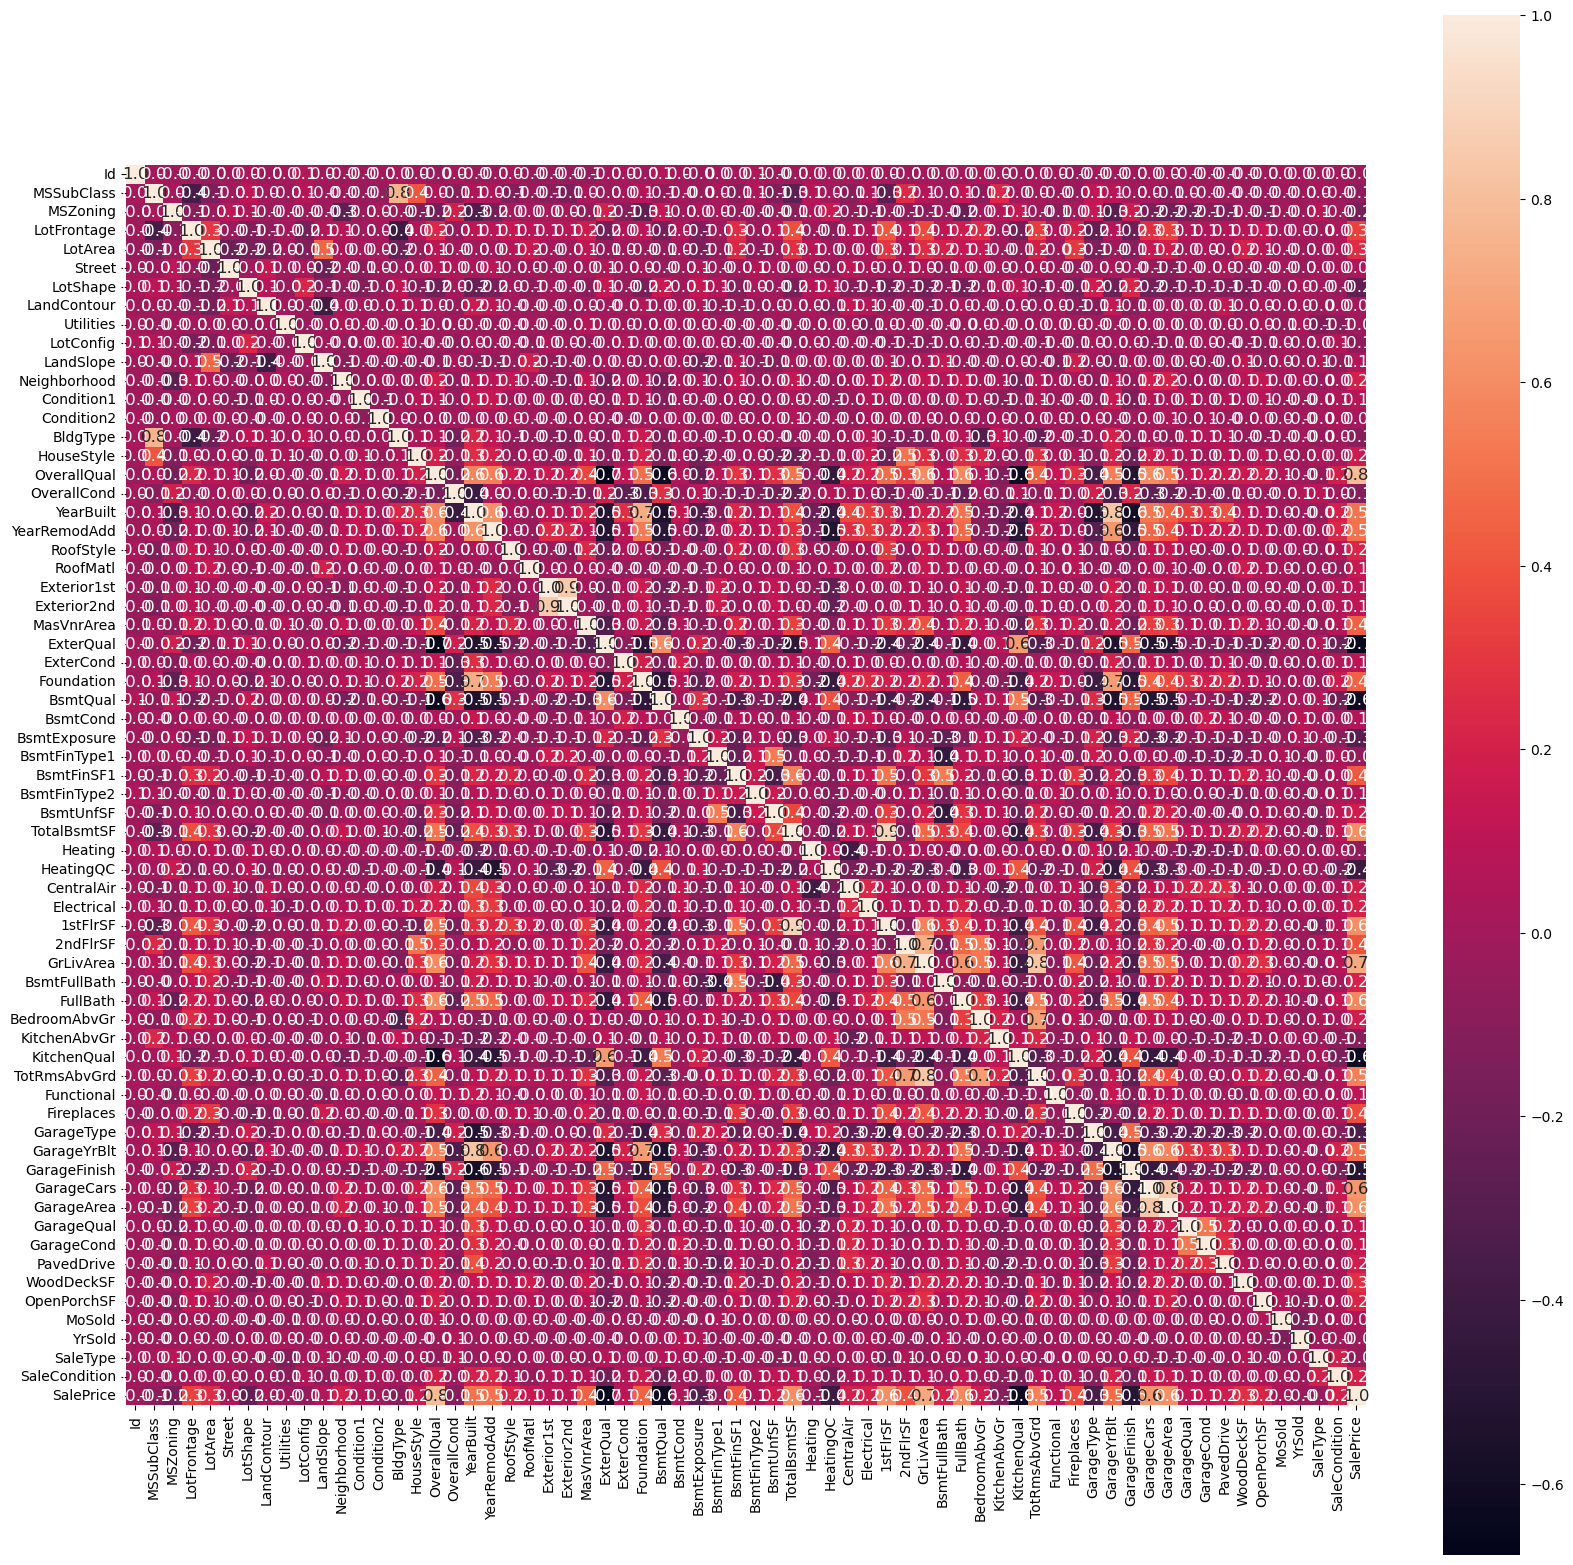

In [49]:
plt.figure(figsize=(20,20))
sns.heatmap(correlation,square=True,fmt='.1f',
            annot=True,annot_kws={'size':12})

In [50]:
df.shape

(1346, 66)

In [51]:
G1 = df.iloc[:, :19]
G1.shape

(1346, 19)

In [52]:
G2 = df.iloc[:, 19:38]
G2.shape

(1346, 19)

In [53]:
G3 = df.iloc[:, 38:57]
G3.shape

(1346, 19)

In [54]:
G4 = df.iloc[:, 57:66]
G4.shape

(1346, 9)

<Axes: >

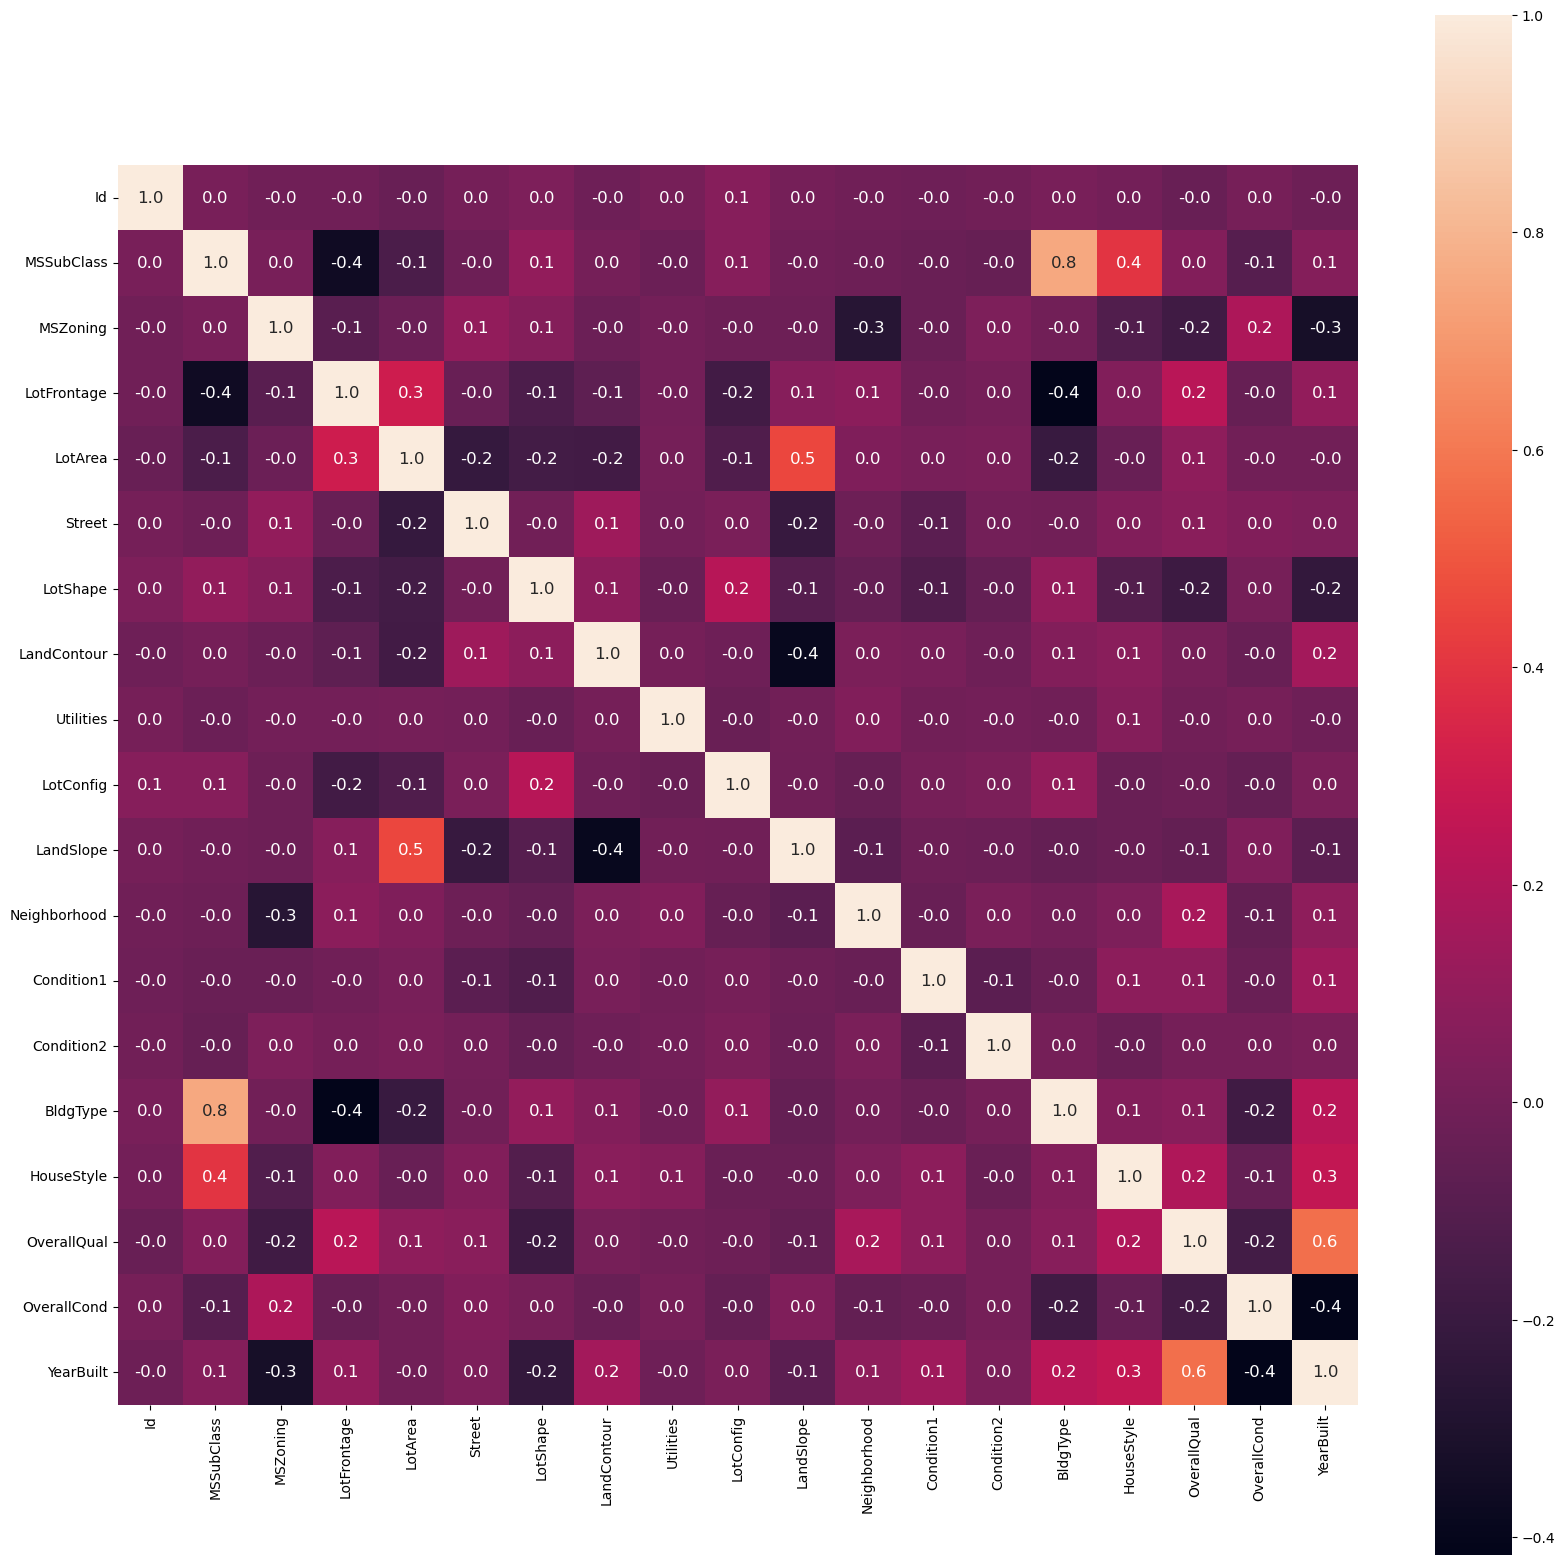

In [55]:
#construct a heatmap to understand the correlation 
correlation = G1.corr()

plt.figure(figsize=(20,20))
sns.heatmap(correlation,square=True,fmt='.1f',annot=True,annot_kws={'size':12})

In [57]:
# axis = 1 for column drop
G1.drop(['OverallCond' , 'Id' ,'Condition2','Condition1','Neighborhood','LandSlope','MSZoning',
         'Street','LandContour','Utilities','LotConfig'],axis=1,inplace=True)

In [58]:
G1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1346 entries, 0 to 1459
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSSubClass   1346 non-null   int64  
 1   LotFrontage  1346 non-null   float64
 2   LotArea      1346 non-null   int64  
 3   LotShape     1346 non-null   int32  
 4   BldgType     1346 non-null   int32  
 5   HouseStyle   1346 non-null   int32  
 6   OverallQual  1346 non-null   int64  
 7   YearBuilt    1346 non-null   int64  
dtypes: float64(1), int32(3), int64(4)
memory usage: 78.9 KB


<Axes: >

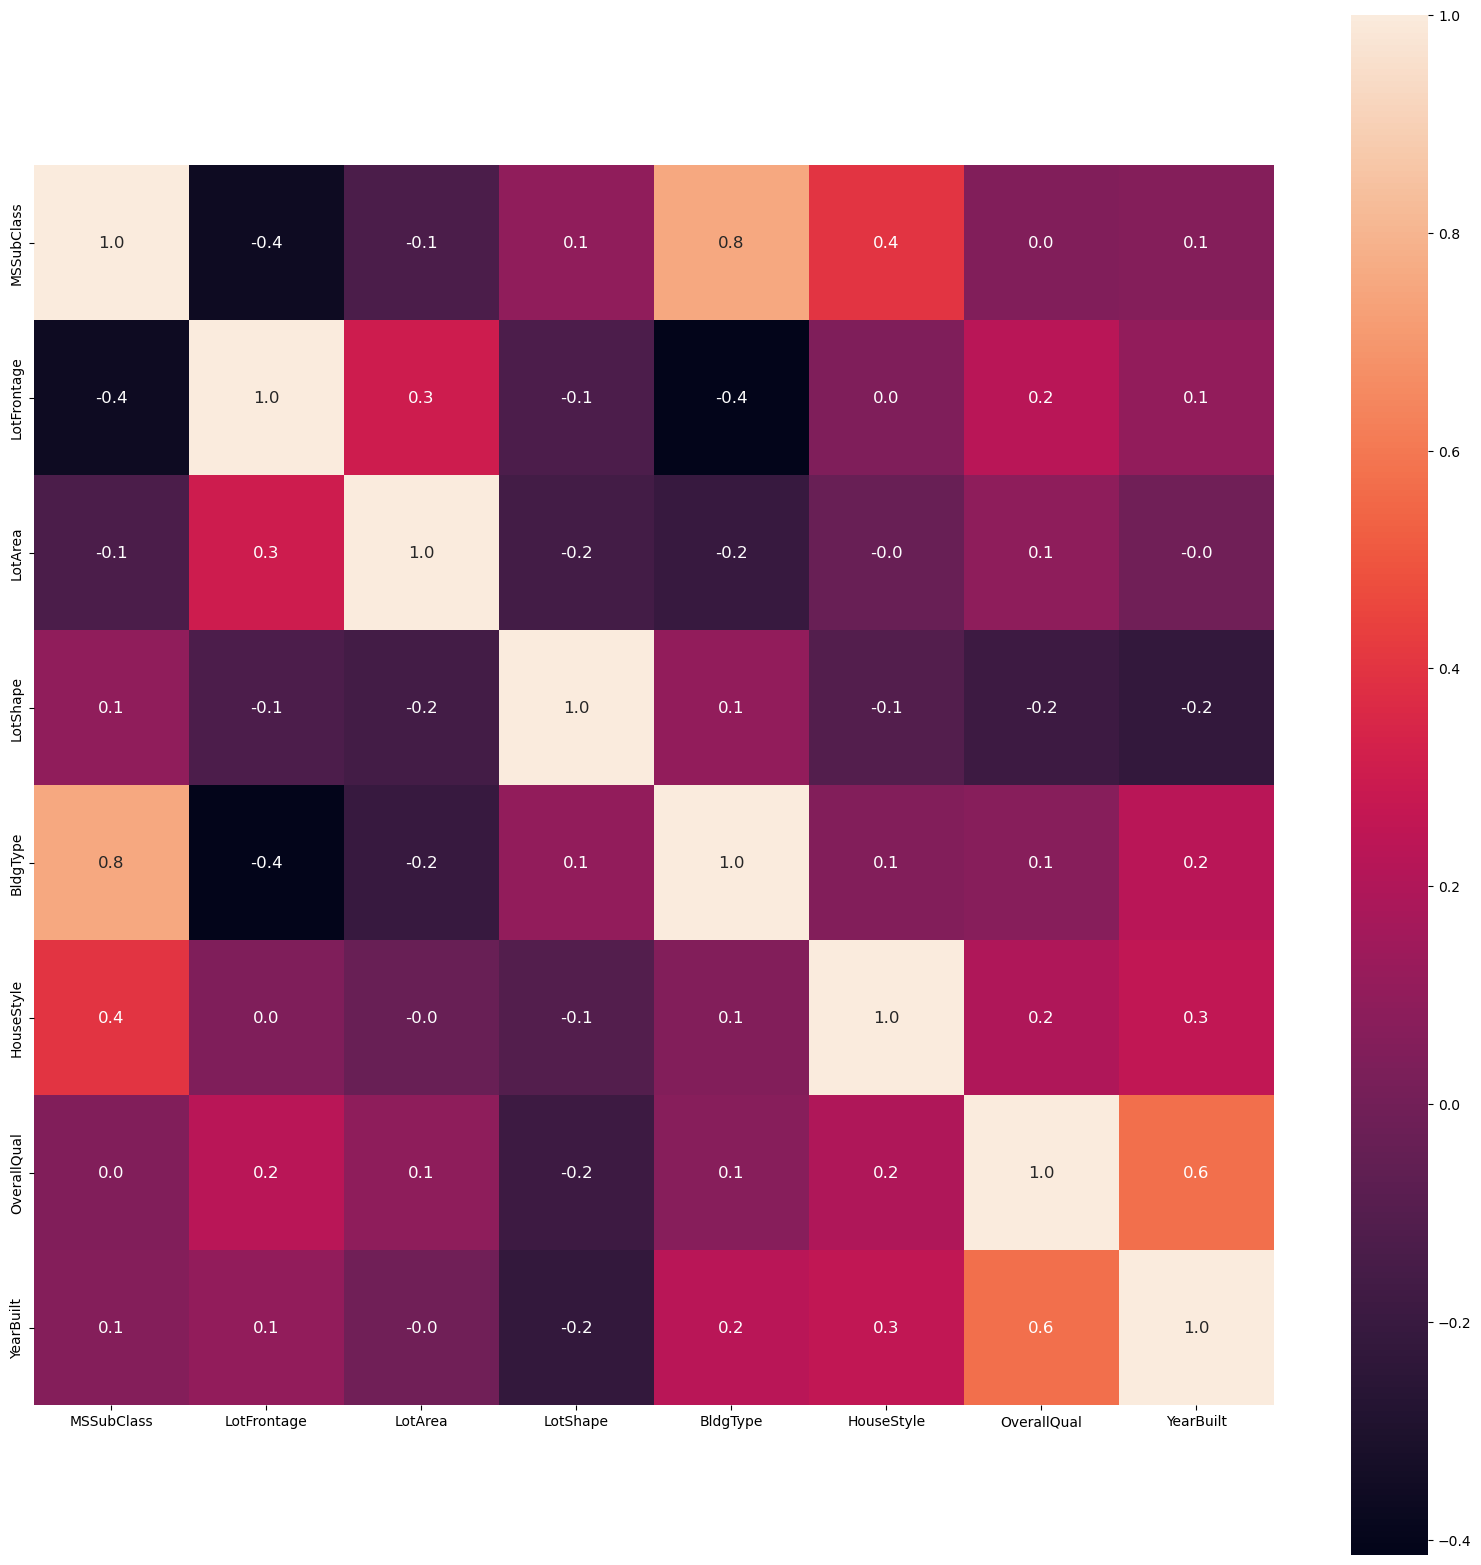

In [59]:
correlation = G1.corr()

plt.figure(figsize=(20,20))
sns.heatmap(correlation,square=True,fmt='.1f',annot=True,annot_kws={'size':12})

In [60]:
# now drop in data frame 
df.drop(['OverallCond' , 'Id' ,'Condition2','Condition1','Neighborhood','LandSlope','MSZoning',
         'Street','LandContour','Utilities','LotConfig'],axis=1,inplace=True)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1346 entries, 0 to 1459
Data columns (total 55 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1346 non-null   int64  
 1   LotFrontage    1346 non-null   float64
 2   LotArea        1346 non-null   int64  
 3   LotShape       1346 non-null   int32  
 4   BldgType       1346 non-null   int32  
 5   HouseStyle     1346 non-null   int32  
 6   OverallQual    1346 non-null   int64  
 7   YearBuilt      1346 non-null   int64  
 8   YearRemodAdd   1346 non-null   int64  
 9   RoofStyle      1346 non-null   int32  
 10  RoofMatl       1346 non-null   int32  
 11  Exterior1st    1346 non-null   int32  
 12  Exterior2nd    1346 non-null   int32  
 13  MasVnrArea     1346 non-null   float64
 14  ExterQual      1346 non-null   int32  
 15  ExterCond      1346 non-null   int32  
 16  Foundation     1346 non-null   int32  
 17  BsmtQual       1346 non-null   int32  
 18  BsmtCond     

<Axes: >

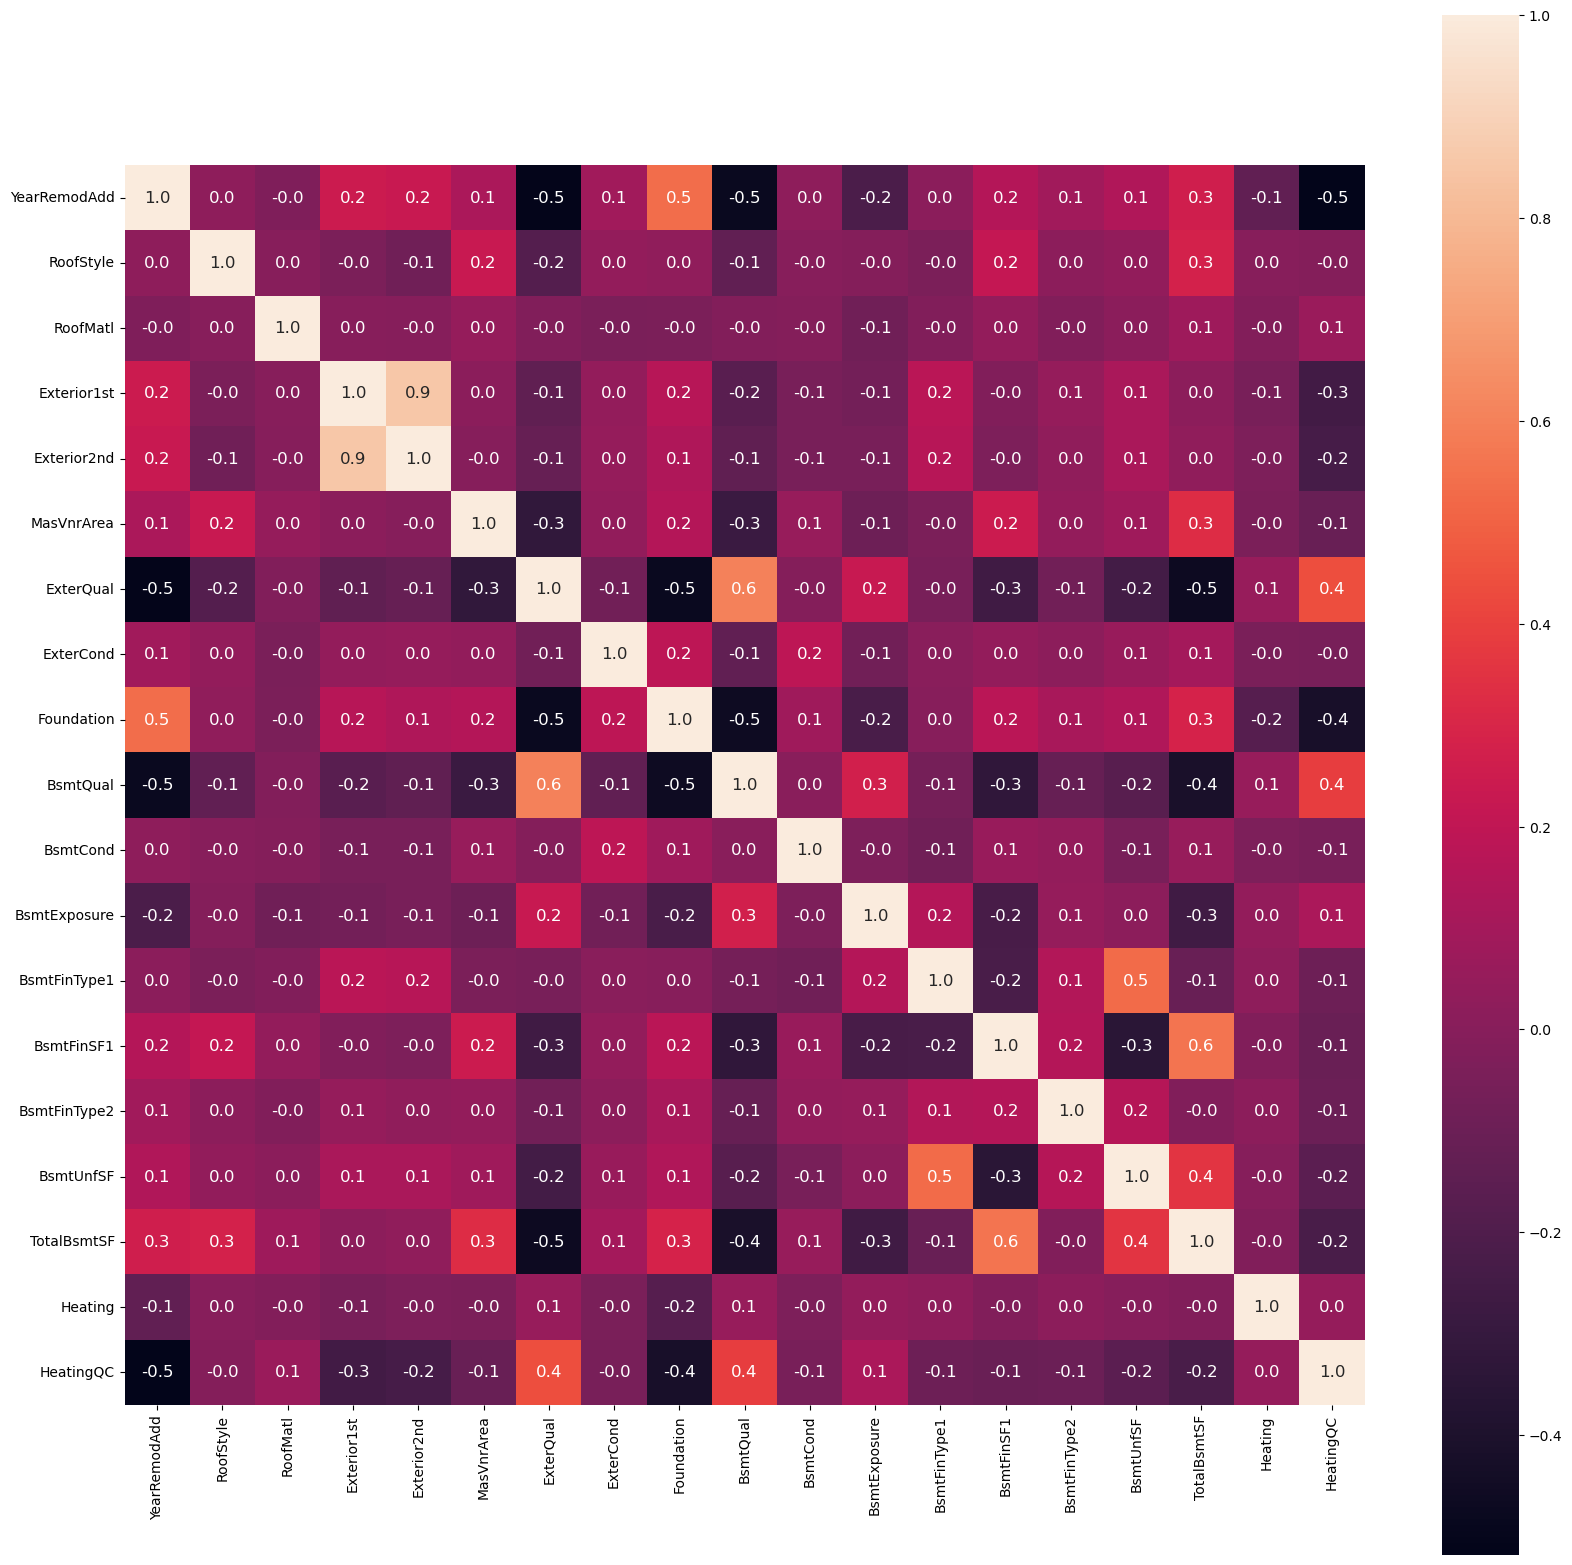

In [62]:
correlation = G2.corr()

plt.figure(figsize=(20,20))
sns.heatmap(correlation,square=True,fmt='.1f',annot=True,annot_kws={'size':12})

In [63]:
G2.drop(['Heating','ExterCond','RoofMatl','RoofStyle'],axis=1 ,inplace=True)

In [64]:
G2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1346 entries, 0 to 1459
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   YearRemodAdd  1346 non-null   int64  
 1   Exterior1st   1346 non-null   int32  
 2   Exterior2nd   1346 non-null   int32  
 3   MasVnrArea    1346 non-null   float64
 4   ExterQual     1346 non-null   int32  
 5   Foundation    1346 non-null   int32  
 6   BsmtQual      1346 non-null   int32  
 7   BsmtCond      1346 non-null   int32  
 8   BsmtExposure  1346 non-null   int32  
 9   BsmtFinType1  1346 non-null   int32  
 10  BsmtFinSF1    1346 non-null   float64
 11  BsmtFinType2  1346 non-null   int32  
 12  BsmtUnfSF     1346 non-null   float64
 13  TotalBsmtSF   1346 non-null   int64  
 14  HeatingQC     1346 non-null   int32  
dtypes: float64(3), int32(10), int64(2)
memory usage: 115.7 KB


In [65]:
df.drop(['Heating','ExterCond','RoofMatl','RoofStyle'],axis=1 ,inplace=True)

<Axes: >

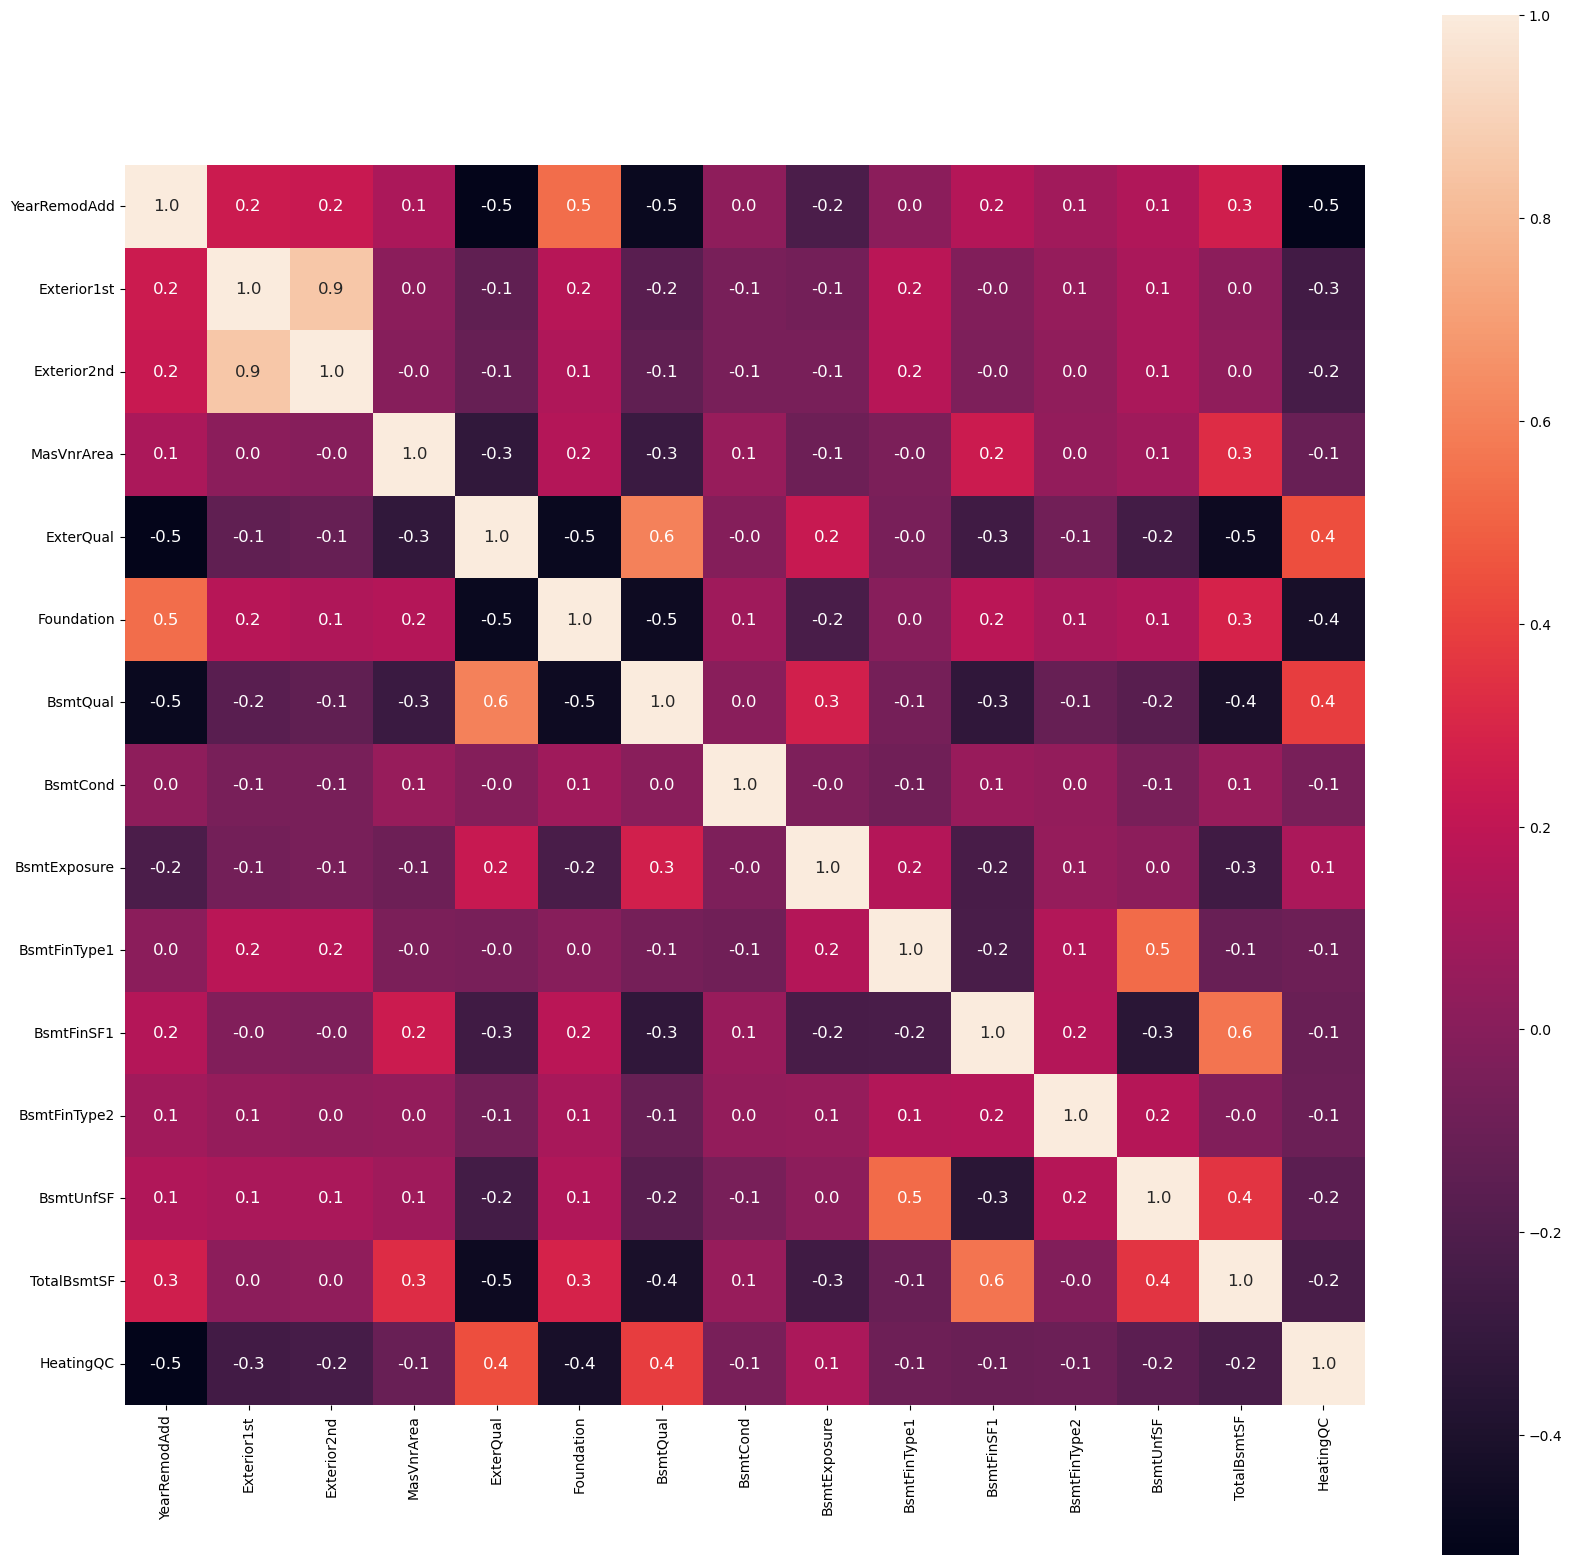

In [66]:
correlation = G2.corr()

plt.figure(figsize=(20,20))
sns.heatmap(correlation,square=True,fmt='.1f',annot=True,annot_kws={'size':12})

In [67]:
G2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1346 entries, 0 to 1459
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   YearRemodAdd  1346 non-null   int64  
 1   Exterior1st   1346 non-null   int32  
 2   Exterior2nd   1346 non-null   int32  
 3   MasVnrArea    1346 non-null   float64
 4   ExterQual     1346 non-null   int32  
 5   Foundation    1346 non-null   int32  
 6   BsmtQual      1346 non-null   int32  
 7   BsmtCond      1346 non-null   int32  
 8   BsmtExposure  1346 non-null   int32  
 9   BsmtFinType1  1346 non-null   int32  
 10  BsmtFinSF1    1346 non-null   float64
 11  BsmtFinType2  1346 non-null   int32  
 12  BsmtUnfSF     1346 non-null   float64
 13  TotalBsmtSF   1346 non-null   int64  
 14  HeatingQC     1346 non-null   int32  
dtypes: float64(3), int32(10), int64(2)
memory usage: 115.7 KB


<Axes: >

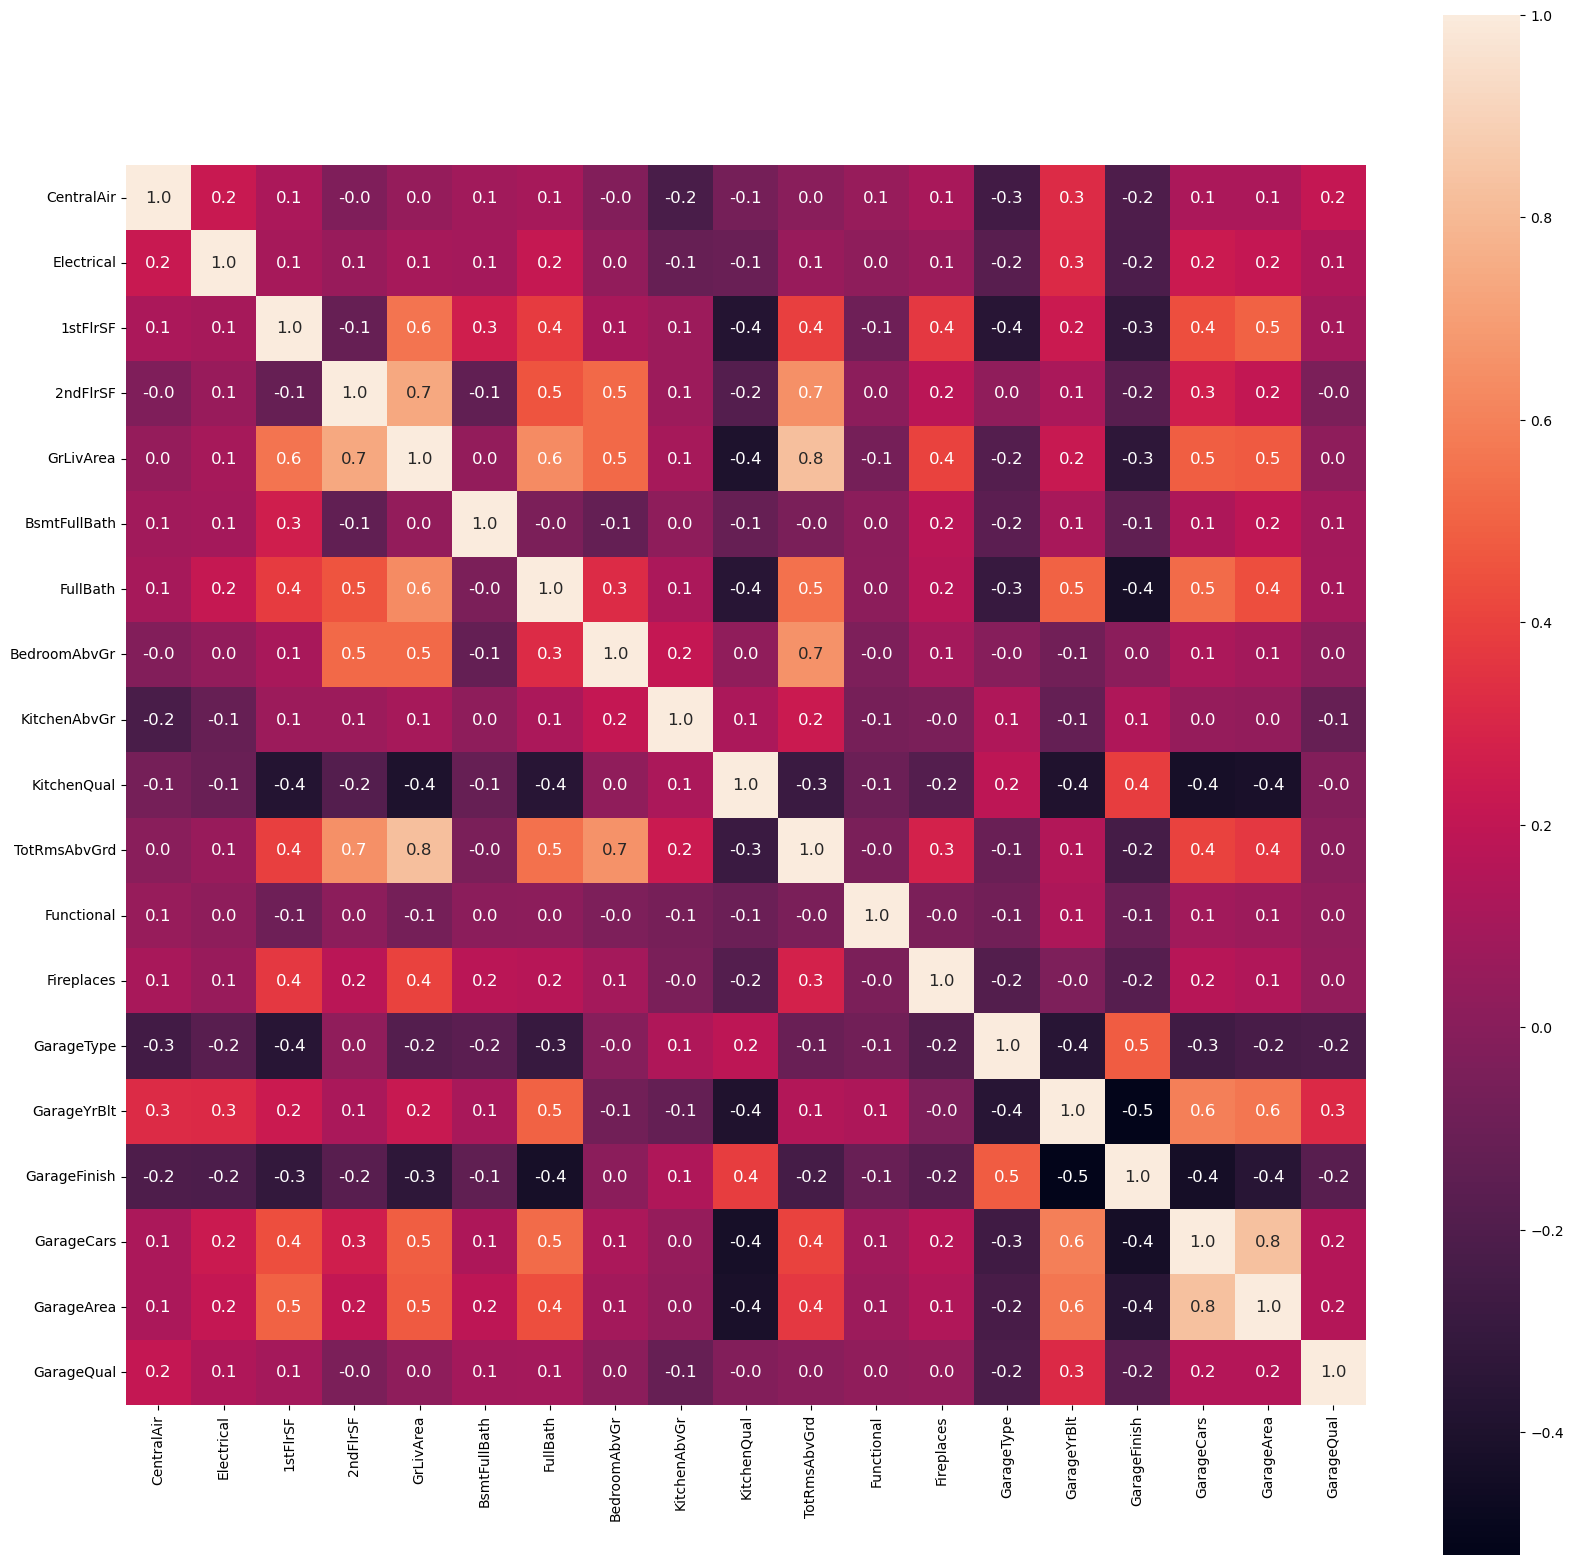

In [68]:
correlation = G3.corr()

plt.figure(figsize=(20,20))
sns.heatmap(correlation,square=True,fmt='.1f',annot=True,annot_kws={'size':12})

<Axes: >

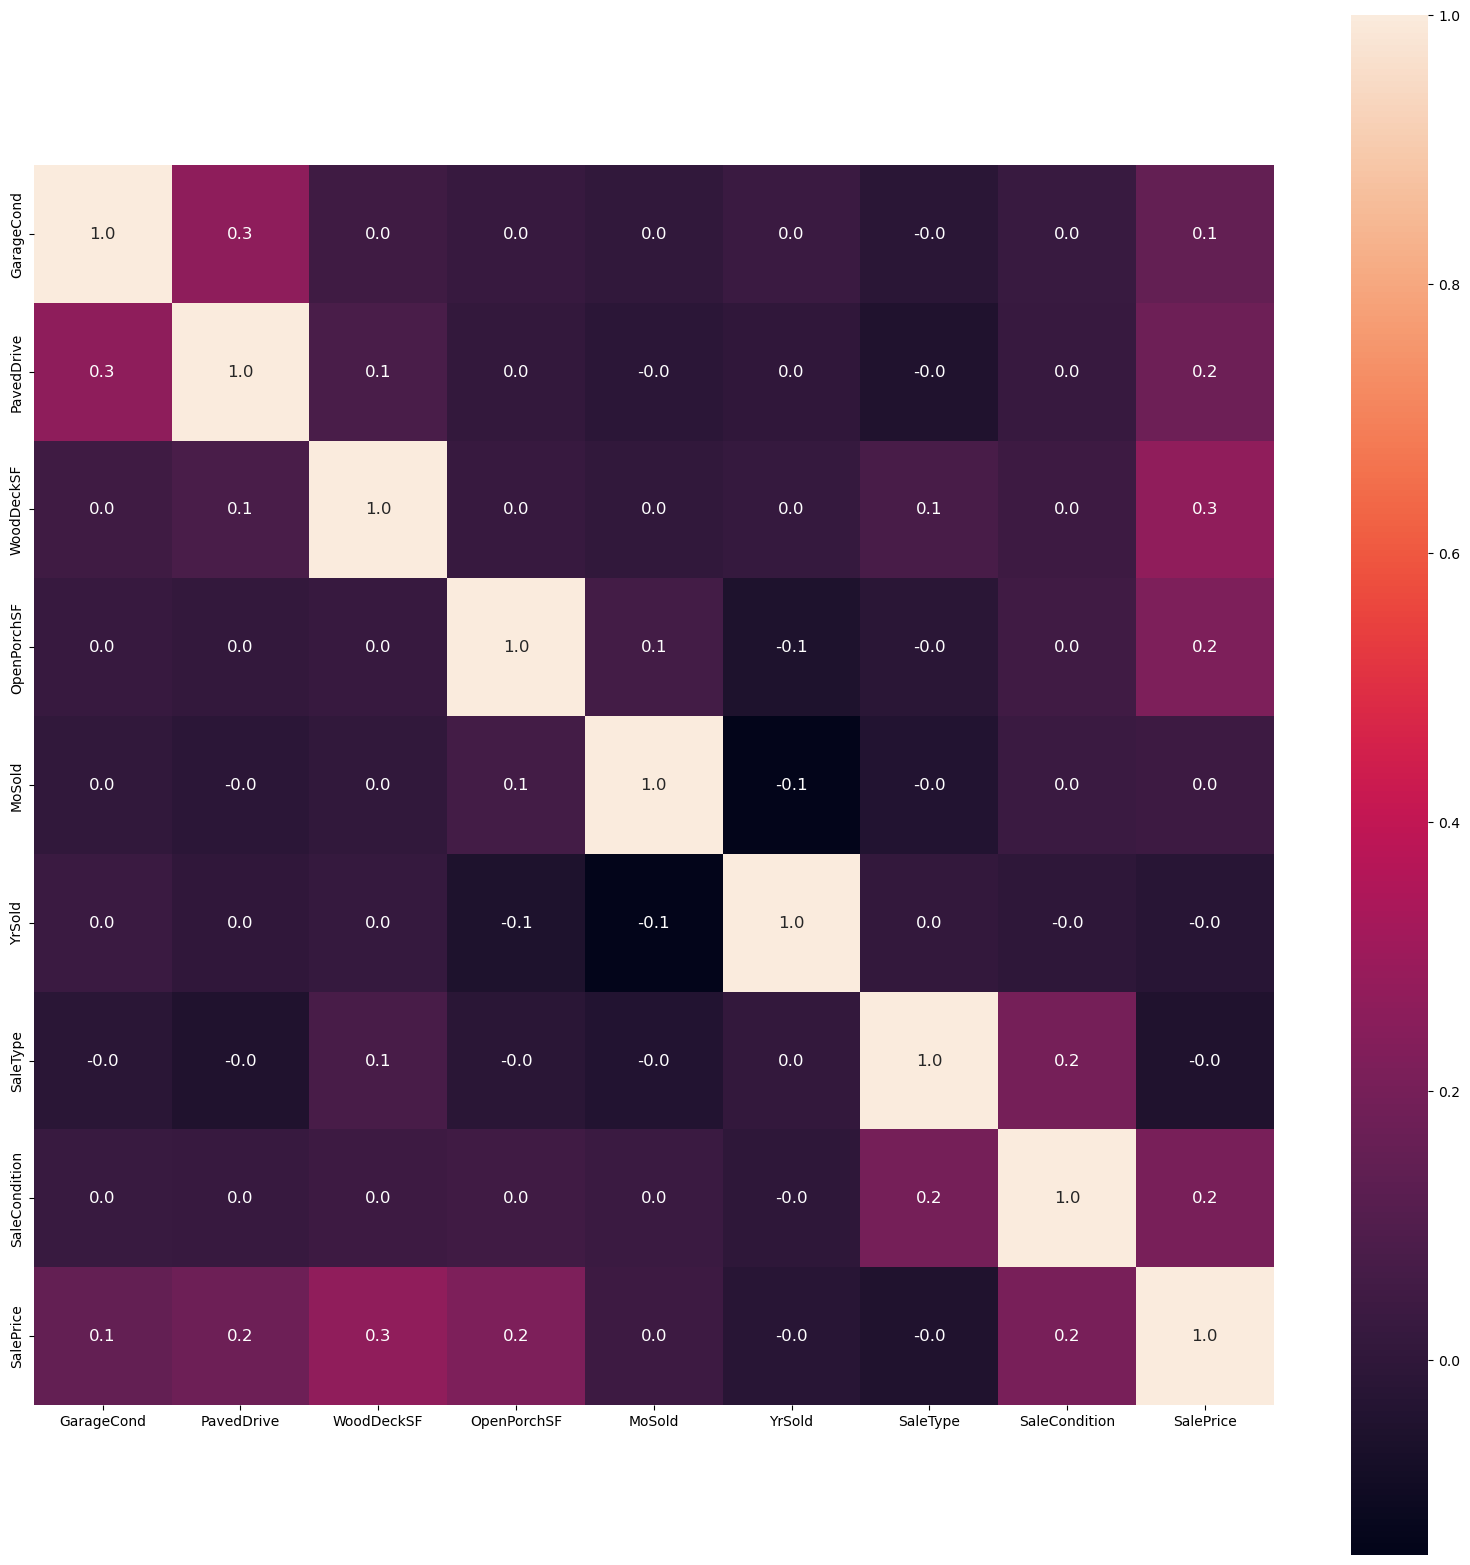

In [69]:
correlation = G4.corr()

plt.figure(figsize=(20,20))
sns.heatmap(correlation,square=True,fmt='.1f',annot=True,annot_kws={'size':12})

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1346 entries, 0 to 1459
Data columns (total 51 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1346 non-null   int64  
 1   LotFrontage    1346 non-null   float64
 2   LotArea        1346 non-null   int64  
 3   LotShape       1346 non-null   int32  
 4   BldgType       1346 non-null   int32  
 5   HouseStyle     1346 non-null   int32  
 6   OverallQual    1346 non-null   int64  
 7   YearBuilt      1346 non-null   int64  
 8   YearRemodAdd   1346 non-null   int64  
 9   Exterior1st    1346 non-null   int32  
 10  Exterior2nd    1346 non-null   int32  
 11  MasVnrArea     1346 non-null   float64
 12  ExterQual      1346 non-null   int32  
 13  Foundation     1346 non-null   int32  
 14  BsmtQual       1346 non-null   int32  
 15  BsmtCond       1346 non-null   int32  
 16  BsmtExposure   1346 non-null   int32  
 17  BsmtFinType1   1346 non-null   int32  
 18  BsmtFinSF1   

<Axes: >

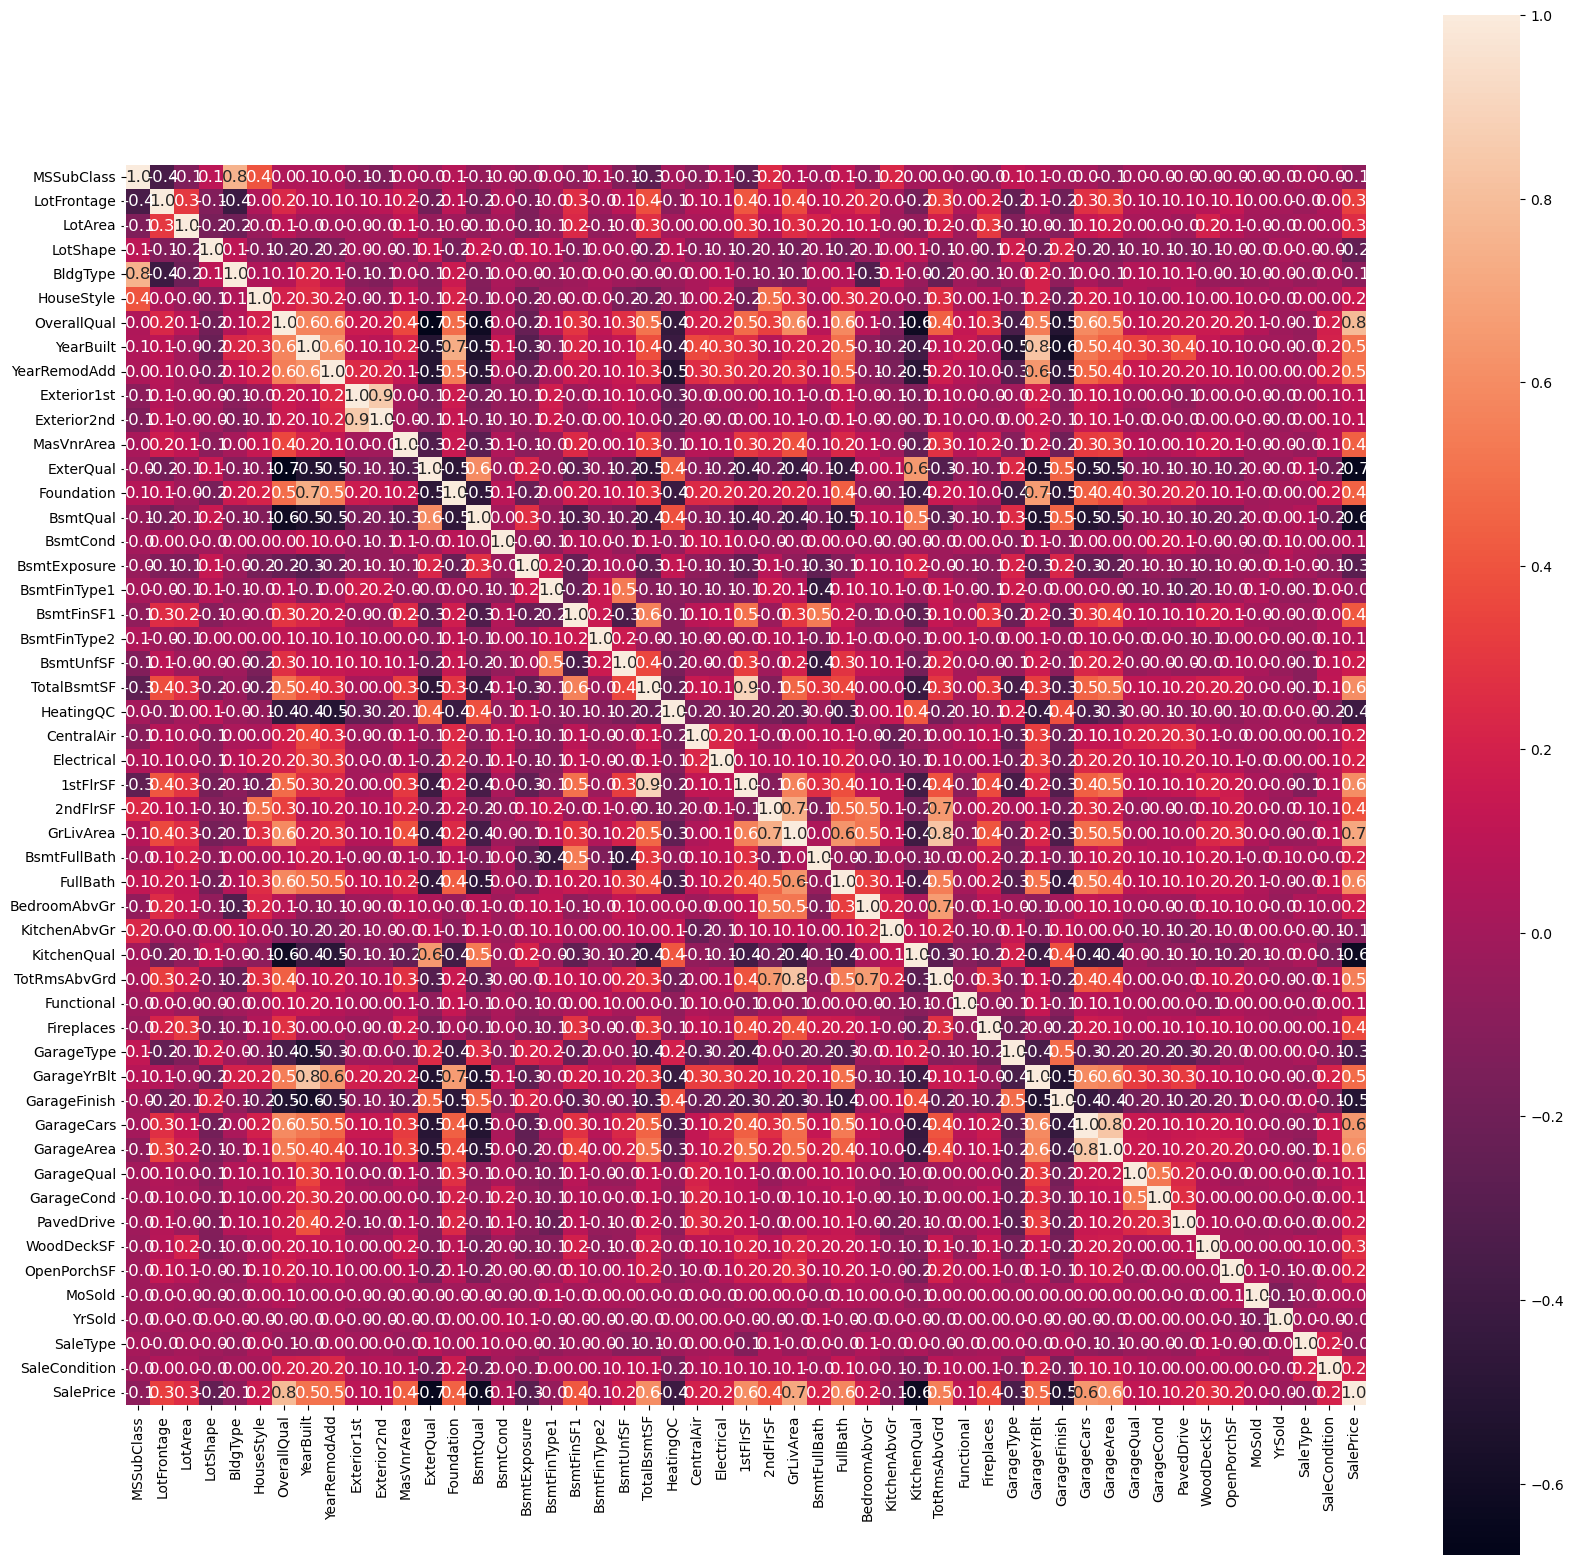

In [71]:
correlation = df.corr()

plt.figure(figsize=(20,20))
sns.heatmap(correlation,square=True,fmt='.1f',annot=True,annot_kws={'size':12})

In [72]:
G1 = df.iloc[:, :20]
G1.shape

(1346, 20)

In [73]:
G2 = df.iloc[:, 20:40]
G2.shape

(1346, 20)

In [74]:
G3 = df.iloc[:, 40:51]
G3.shape

(1346, 11)

<Axes: >

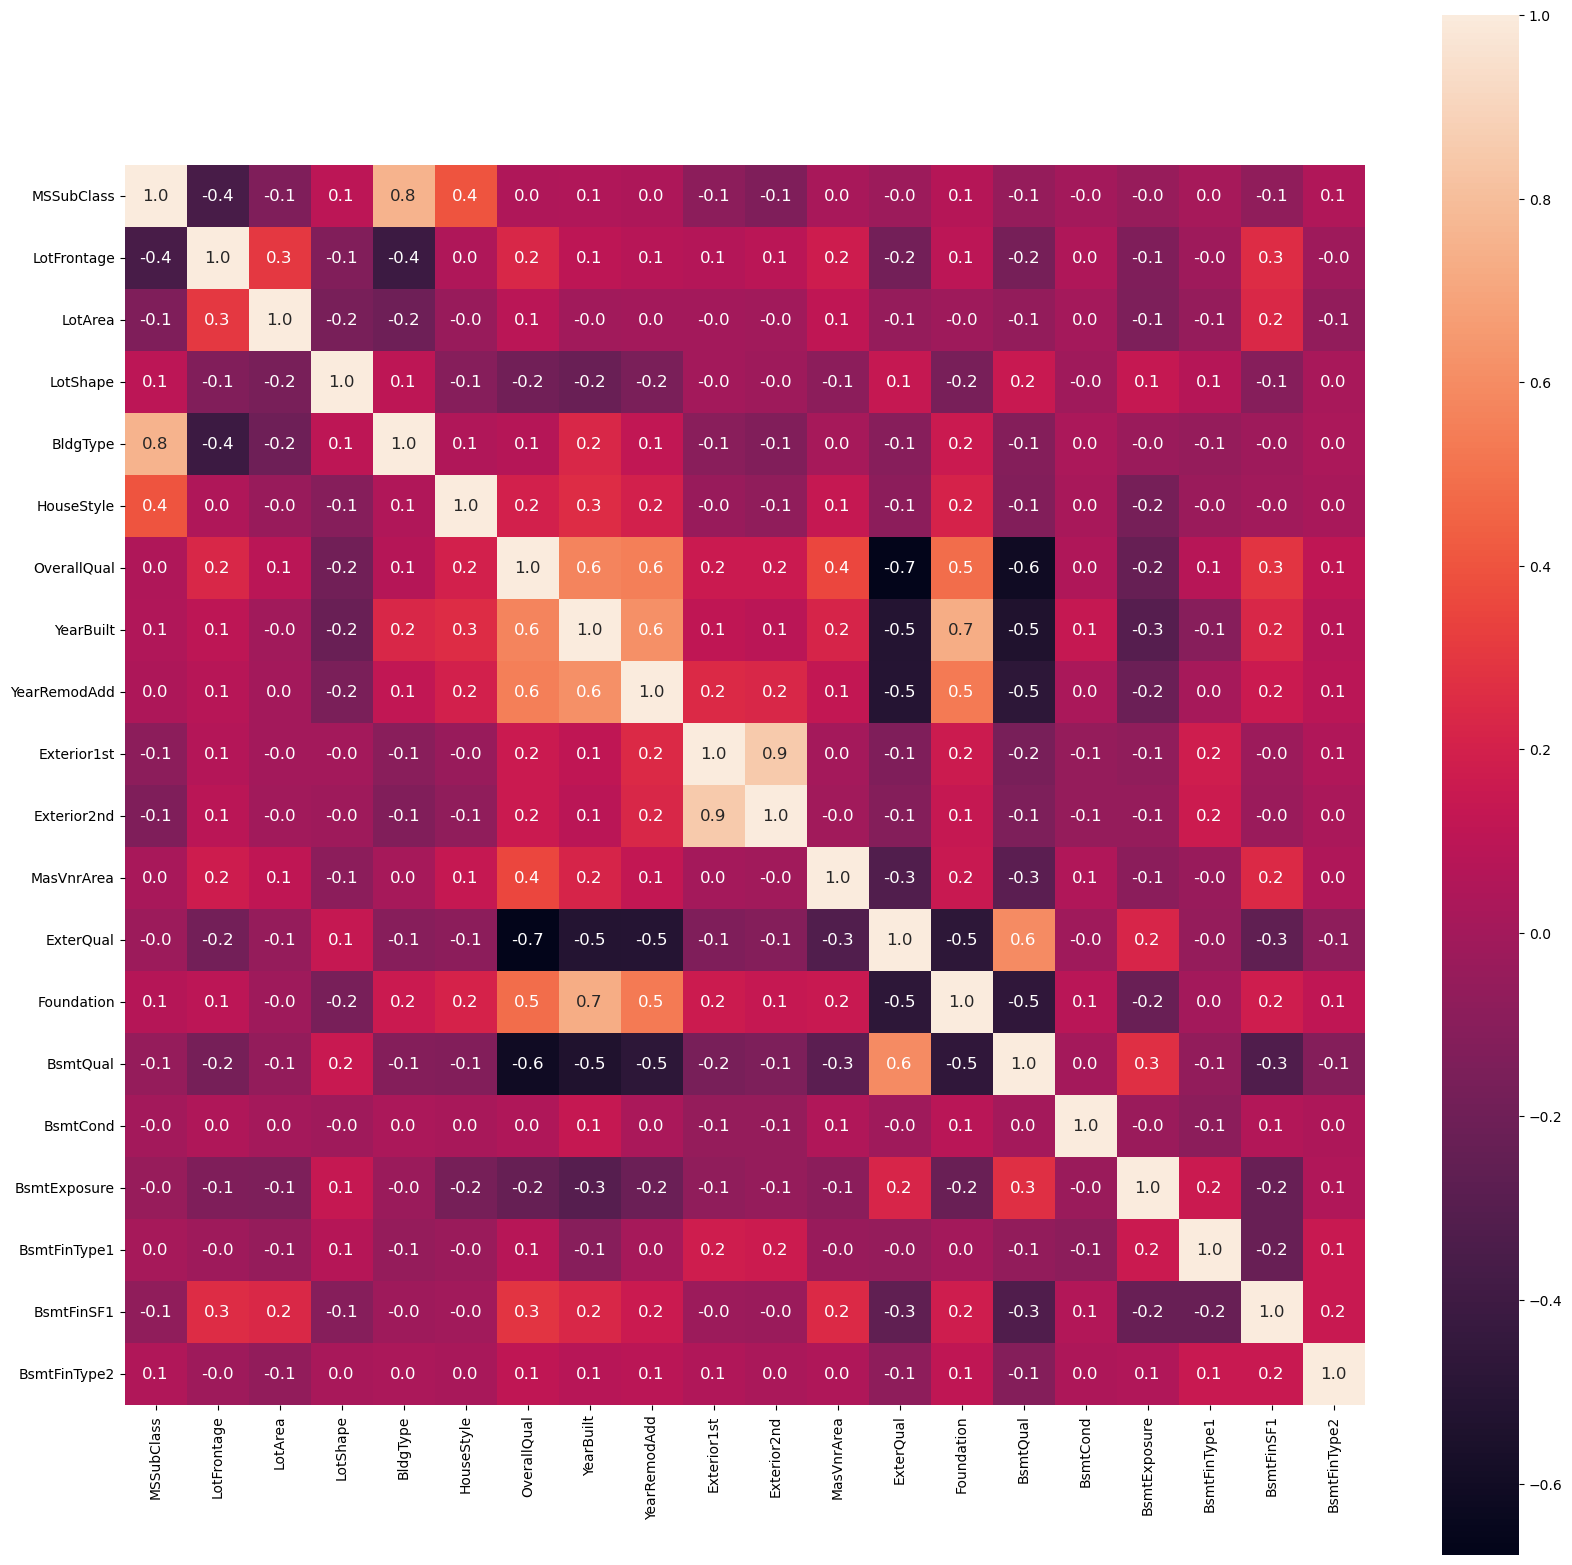

In [75]:
correlation = G1.corr()

plt.figure(figsize=(20,20))
sns.heatmap(correlation,square=True,fmt='.1f',annot=True,annot_kws={'size':12})

In [76]:
G1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1346 entries, 0 to 1459
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1346 non-null   int64  
 1   LotFrontage   1346 non-null   float64
 2   LotArea       1346 non-null   int64  
 3   LotShape      1346 non-null   int32  
 4   BldgType      1346 non-null   int32  
 5   HouseStyle    1346 non-null   int32  
 6   OverallQual   1346 non-null   int64  
 7   YearBuilt     1346 non-null   int64  
 8   YearRemodAdd  1346 non-null   int64  
 9   Exterior1st   1346 non-null   int32  
 10  Exterior2nd   1346 non-null   int32  
 11  MasVnrArea    1346 non-null   float64
 12  ExterQual     1346 non-null   int32  
 13  Foundation    1346 non-null   int32  
 14  BsmtQual      1346 non-null   int32  
 15  BsmtCond      1346 non-null   int32  
 16  BsmtExposure  1346 non-null   int32  
 17  BsmtFinType1  1346 non-null   int32  
 18  BsmtFinSF1    1346 non-null   flo

In [77]:
G1.drop('BsmtCond',axis=1,inplace=True)

In [78]:
df.drop('BsmtCond',axis=1,inplace=True)

<Axes: >

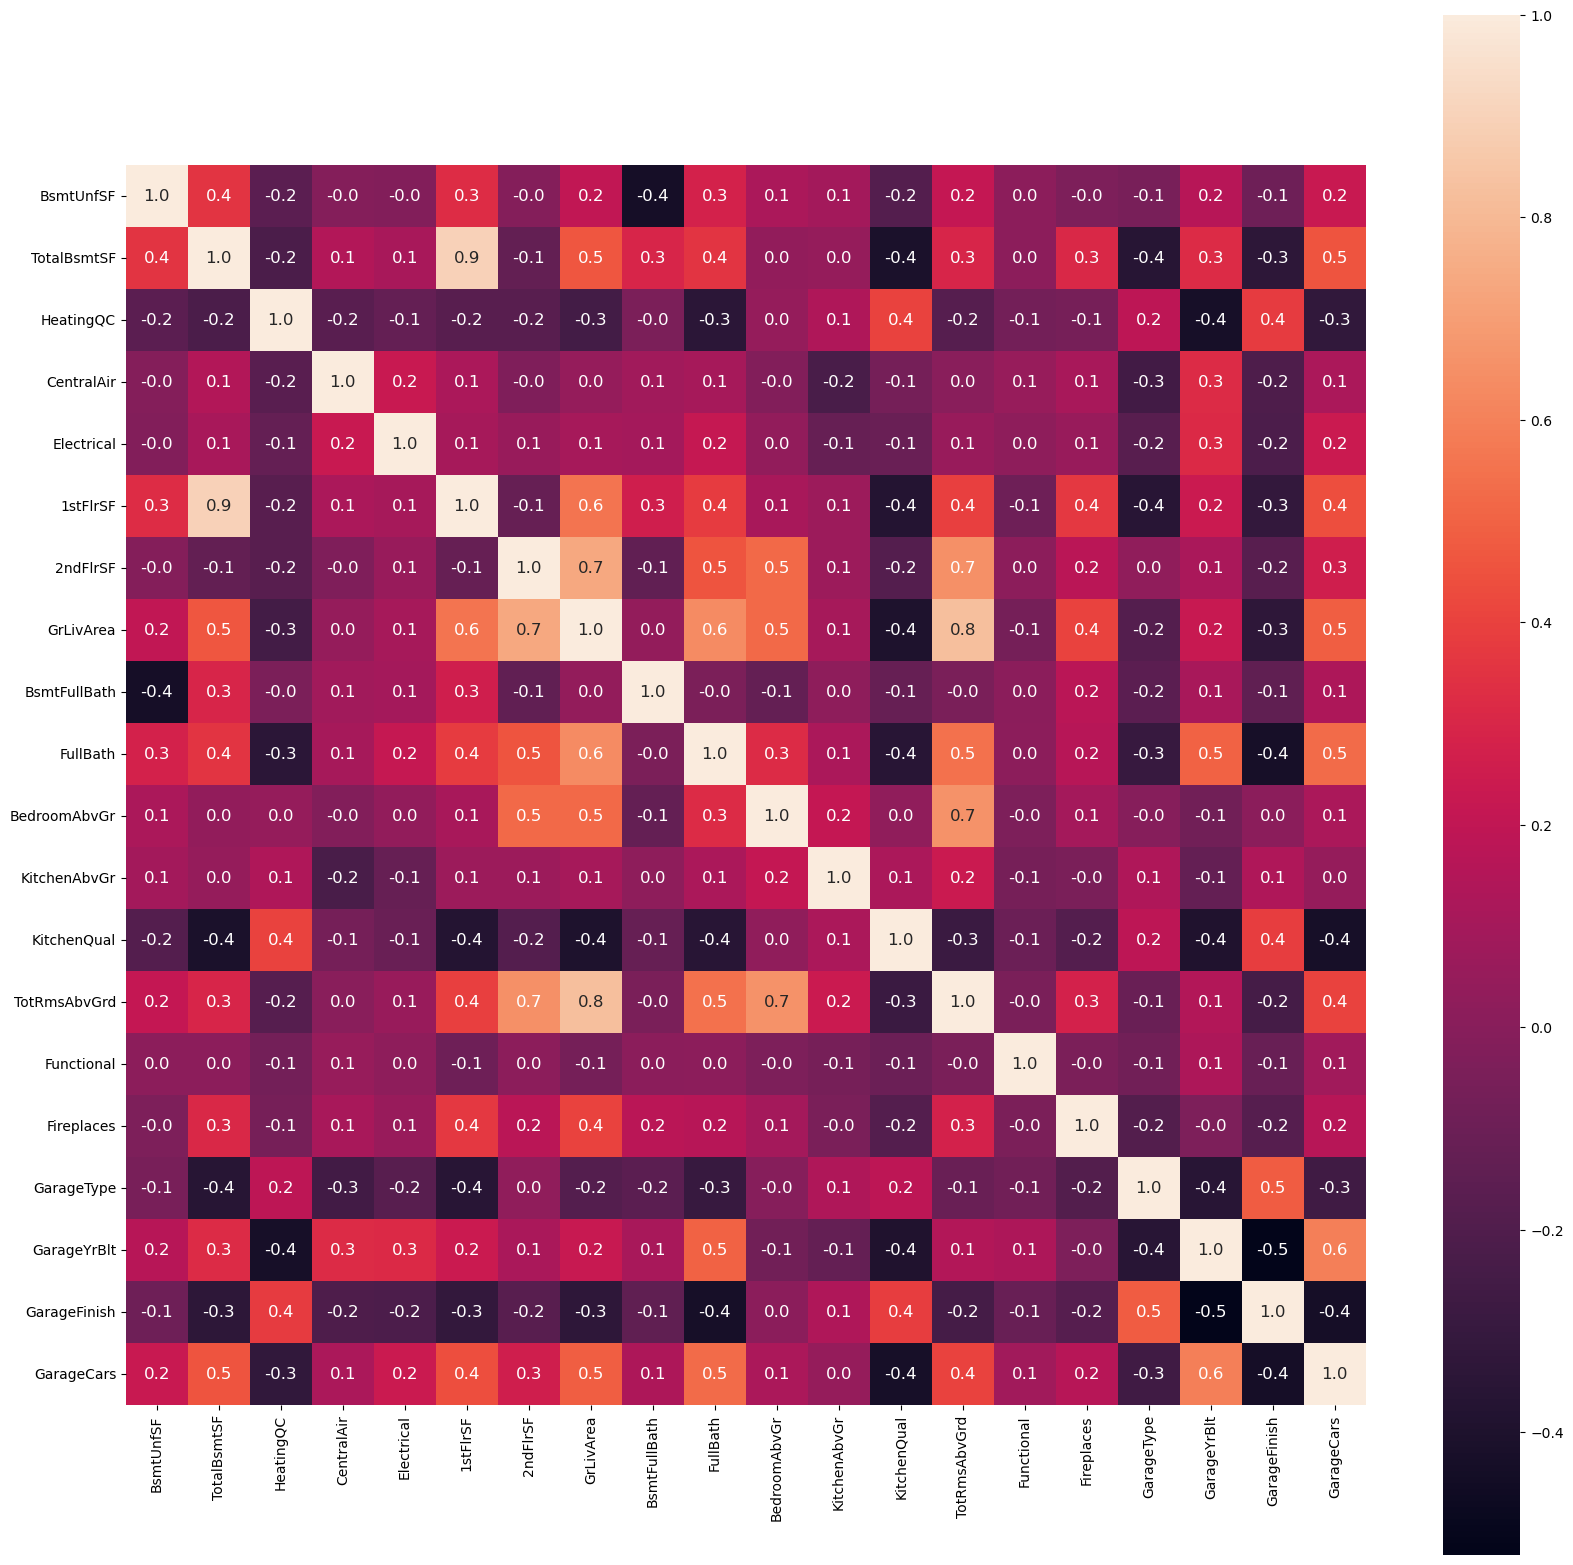

In [79]:
correlation = G2.corr()

plt.figure(figsize=(20,20))
sns.heatmap(correlation,square=True,fmt='.1f',annot=True,annot_kws={'size':12})

In [80]:
G2.drop('Functional', axis = 1,inplace=True)

In [81]:
df.drop('Functional', axis = 1,inplace=True)

<Axes: >

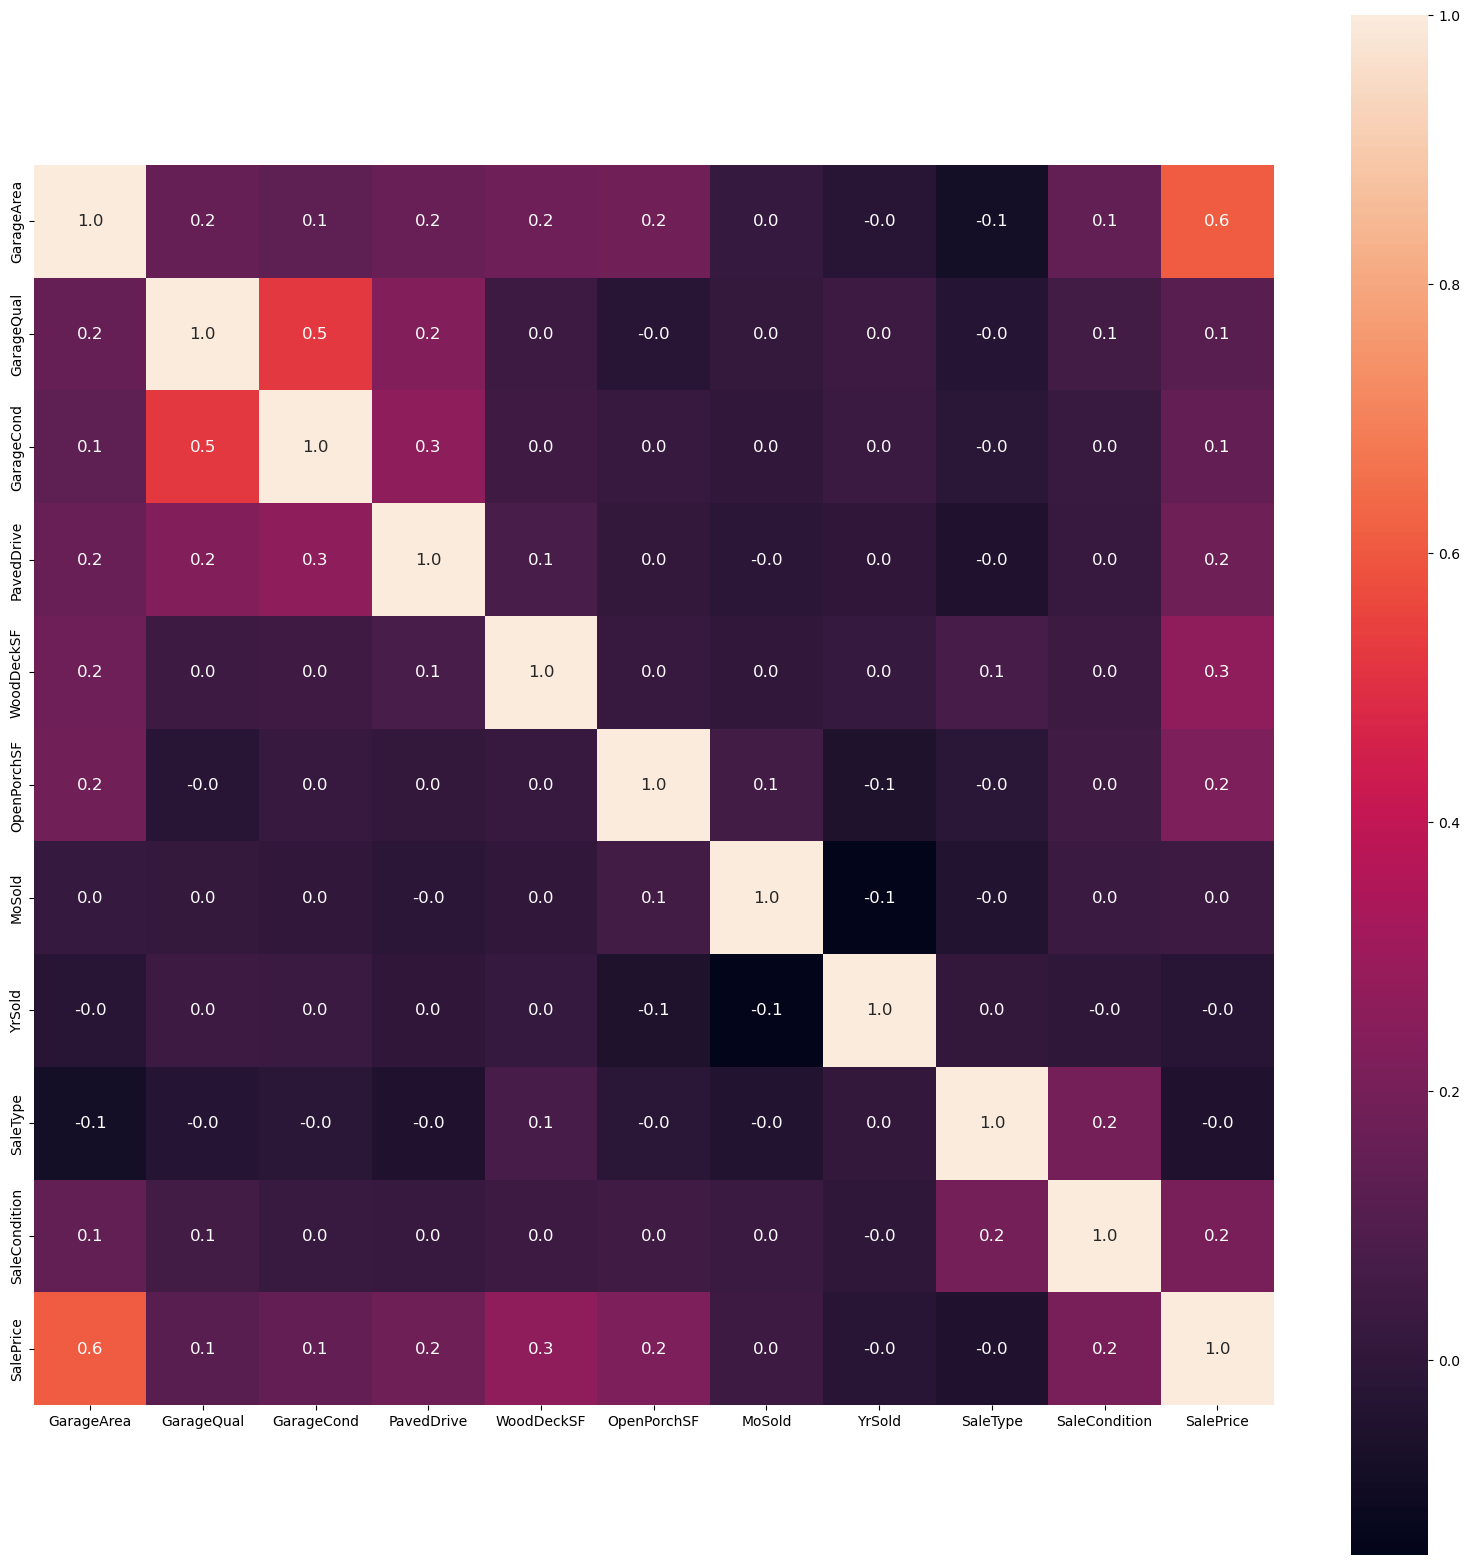

In [83]:
correlation = G3.corr()

plt.figure(figsize=(20,20))
sns.heatmap(correlation,square=True,fmt='.1f',annot=True,annot_kws={'size':12})

In [84]:
G3.drop(['SaleCondition','SaleType','YrSold','MoSold'],axis=1 ,inplace=True)

In [85]:
df.drop(['SaleCondition','SaleType','YrSold','MoSold'],axis=1 ,inplace=True)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1346 entries, 0 to 1459
Data columns (total 45 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1346 non-null   int64  
 1   LotFrontage   1346 non-null   float64
 2   LotArea       1346 non-null   int64  
 3   LotShape      1346 non-null   int32  
 4   BldgType      1346 non-null   int32  
 5   HouseStyle    1346 non-null   int32  
 6   OverallQual   1346 non-null   int64  
 7   YearBuilt     1346 non-null   int64  
 8   YearRemodAdd  1346 non-null   int64  
 9   Exterior1st   1346 non-null   int32  
 10  Exterior2nd   1346 non-null   int32  
 11  MasVnrArea    1346 non-null   float64
 12  ExterQual     1346 non-null   int32  
 13  Foundation    1346 non-null   int32  
 14  BsmtQual      1346 non-null   int32  
 15  BsmtExposure  1346 non-null   int32  
 16  BsmtFinType1  1346 non-null   int32  
 17  BsmtFinSF1    1346 non-null   float64
 18  BsmtFinType2  1346 non-null   int

In [87]:
df['BsmtQual'].value_counts()

BsmtQual
2    598
3    595
0    121
1     32
Name: count, dtype: int64

In [88]:
df = df[df['BsmtQual'] != 1]
df.shape

(1314, 45)

# Predict type of HeatingQC

In [89]:
X = df.drop('BsmtQual',axis=1)
Y = df['BsmtQual']

In [90]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1314 entries, 0 to 1459
Data columns (total 44 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1314 non-null   int64  
 1   LotFrontage   1314 non-null   float64
 2   LotArea       1314 non-null   int64  
 3   LotShape      1314 non-null   int32  
 4   BldgType      1314 non-null   int32  
 5   HouseStyle    1314 non-null   int32  
 6   OverallQual   1314 non-null   int64  
 7   YearBuilt     1314 non-null   int64  
 8   YearRemodAdd  1314 non-null   int64  
 9   Exterior1st   1314 non-null   int32  
 10  Exterior2nd   1314 non-null   int32  
 11  MasVnrArea    1314 non-null   float64
 12  ExterQual     1314 non-null   int32  
 13  Foundation    1314 non-null   int32  
 14  BsmtExposure  1314 non-null   int32  
 15  BsmtFinType1  1314 non-null   int32  
 16  BsmtFinSF1    1314 non-null   float64
 17  BsmtFinType2  1314 non-null   int32  
 18  BsmtUnfSF     1314 non-null   flo

In [91]:
X.shape

(1314, 44)

In [92]:
Y.info()

<class 'pandas.core.series.Series'>
Index: 1314 entries, 0 to 1459
Series name: BsmtQual
Non-Null Count  Dtype
--------------  -----
1314 non-null   int32
dtypes: int32(1)
memory usage: 15.4 KB


In [93]:
Y.shape

(1314,)

In [94]:
from sklearn.model_selection  import train_test_split

X_TRAIN , X_TEST , Y_TRAIN, Y_TEST = train_test_split(X,Y, test_size = 0.25, random_state=30)

print("Size of Train X =  " , len(X_TRAIN))
print("Size of Train Y =  " , len(Y_TRAIN))
print("Size of Test X =  " , len(X_TEST))
print("Size of Test Y =  " , len(Y_TEST))

Size of Train X =   985
Size of Train Y =   985
Size of Test X =   329
Size of Test Y =   329


# <u>GaussianNB Base Classifier</u>

In [95]:
from sklearn.naive_bayes import GaussianNB 

gnb = GaussianNB()
#fit the regressor whit X and Y data 
gnb.fit(X_TRAIN,Y_TRAIN)

GaussianNB()

In [96]:
# accuracy for prediction on training data
training_data_prediction = gnb.predict(X_TRAIN)
print(training_data_prediction)

[3 0 2 2 2 2 3 3 3 2 3 2 2 3 2 3 3 2 0 3 2 3 0 3 2 2 2 3 3 3 3 2 3 3 3 3 3
 3 3 0 3 2 3 0 0 2 2 2 3 3 0 3 0 3 0 3 3 2 3 0 0 3 3 2 2 3 3 3 3 2 3 3 2 0
 3 2 2 3 3 2 2 3 3 0 3 3 3 2 3 2 0 2 2 3 3 3 3 3 3 3 2 3 2 3 3 3 2 3 3 2 3
 3 2 3 2 3 2 3 3 3 2 2 2 2 0 3 2 3 2 0 2 3 3 3 0 0 3 3 2 3 3 2 2 3 2 3 3 3
 3 0 3 3 3 3 3 2 2 3 2 0 2 2 3 3 3 3 0 0 3 2 2 3 3 3 3 3 3 2 2 0 0 2 3 0 3
 3 0 2 3 2 3 3 2 2 3 2 3 3 2 2 2 3 2 2 0 3 3 3 3 3 2 2 0 3 0 3 0 2 3 3 3 2
 0 3 3 3 0 3 2 0 2 3 2 2 3 2 2 2 2 3 2 0 3 2 3 0 3 3 0 2 2 3 3 3 3 0 2 3 2
 0 3 2 3 2 2 3 3 2 2 3 2 2 2 3 0 3 2 2 3 2 2 2 0 3 3 3 3 2 3 2 3 2 0 3 3 2
 0 2 2 2 3 2 2 0 3 2 3 0 3 3 2 3 3 3 3 3 2 2 2 2 3 2 3 3 0 3 2 3 2 3 3 3 2
 0 2 2 2 2 3 3 3 3 3 2 0 0 2 3 3 3 3 2 3 0 0 2 2 3 2 3 2 0 2 2 0 2 3 2 3 3
 0 2 0 2 2 2 3 3 3 0 3 2 2 3 3 3 3 2 3 2 3 0 2 3 3 2 2 2 2 2 3 2 2 2 0 3 2
 2 0 2 0 3 2 3 3 3 2 2 3 2 3 0 3 2 0 3 3 3 3 3 2 0 3 3 0 0 2 3 3 2 3 2 2 3
 3 3 0 3 2 3 3 3 2 2 2 2 3 3 2 2 2 3 2 0 3 3 2 3 3 2 2 3 0 0 2 2 3 2 3 3 0
 3 3 3 2 2 2 2 3 2 2 2 3 

### prediction on train Data

In [97]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_TRAIN, training_data_prediction)
print("The Accuracy of Prediction is ", accuracy)

The Accuracy of Prediction is  0.7847715736040609


In [98]:
from sklearn.metrics import classification_report, confusion_matrix

confusion_matrix(Y_TRAIN, training_data_prediction)

array([[ 63,  19,   2],
       [ 71, 304,  76],
       [  1,  43, 406]], dtype=int64)

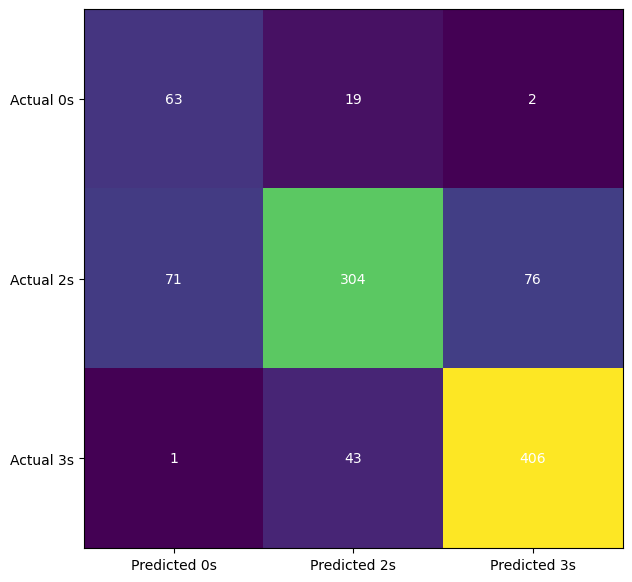

In [99]:
import matplotlib.pyplot as plt 

cm = confusion_matrix(Y_TRAIN,training_data_prediction)

fig,ax = plt.subplots(figsize=(7,7))
ax.imshow(cm)
ax.xaxis.set(ticks=(0,1,2),ticklabels=('Predicted 0s','Predicted 2s','Predicted 3s'))
ax.yaxis.set(ticks=(0,1,2),ticklabels=('Actual 0s','Actual 2s','Actual 3s'))
for i in range(3): 
    for j in range(3):
        ax.text(j,i,cm[i,j],ha='center',va='center',color='white')
plt.show()

In [100]:
report = classification_report(Y_TRAIN,training_data_prediction)
print(report)

              precision    recall  f1-score   support

           0       0.47      0.75      0.58        84
           2       0.83      0.67      0.74       451
           3       0.84      0.90      0.87       450

    accuracy                           0.78       985
   macro avg       0.71      0.78      0.73       985
weighted avg       0.80      0.78      0.79       985



# Testing

In [101]:
# accuracy for prediction on training data
training_data_prediction = gnb.predict(X_TEST)
print(training_data_prediction)

[3 0 2 3 2 3 2 3 2 3 2 2 3 0 2 3 2 3 0 3 3 3 3 0 2 3 2 2 0 3 0 2 2 2 2 0 0
 3 0 0 3 3 3 2 3 2 2 3 3 3 3 3 0 3 3 3 3 0 2 0 3 3 2 0 3 3 3 2 3 3 3 2 3 2
 3 2 0 3 2 2 3 3 3 3 2 3 2 2 2 0 2 0 3 2 3 3 3 3 2 3 2 2 3 2 3 2 3 2 3 0 3
 2 3 2 0 3 3 0 3 2 0 2 3 3 2 2 2 3 3 2 3 2 3 0 2 3 3 3 3 2 2 3 3 0 3 3 0 2
 2 2 2 3 0 2 3 2 0 0 3 3 3 2 2 3 2 3 2 3 0 3 2 3 3 3 2 0 2 3 3 2 0 2 3 3 3
 3 3 2 3 2 0 2 3 3 3 2 2 0 3 3 3 3 2 3 2 2 0 3 2 3 3 3 3 3 3 2 2 0 3 3 3 3
 2 3 2 2 2 3 0 2 3 3 0 2 3 3 3 3 3 3 3 2 3 2 2 2 0 3 0 2 0 0 3 2 2 2 2 2 3
 3 2 2 3 2 3 2 3 3 0 3 3 0 2 0 2 2 0 2 3 2 3 3 2 2 2 3 2 3 3 3 2 3 3 3 3 2
 2 3 0 2 2 2 2 2 3 2 3 2 2 2 3 0 2 3 2 2 3 2 3 2 3 2 3 3 3 0 3 3 2]


In [102]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_TEST, training_data_prediction)
print("The Accuracy of Prediction is ", accuracy)

The Accuracy of Prediction is  0.7872340425531915


In [103]:
from sklearn.metrics import classification_report, confusion_matrix

confusion_matrix(Y_TEST, training_data_prediction)

array([[ 28,   9,   0],
       [ 18, 101,  28],
       [  1,  14, 130]], dtype=int64)

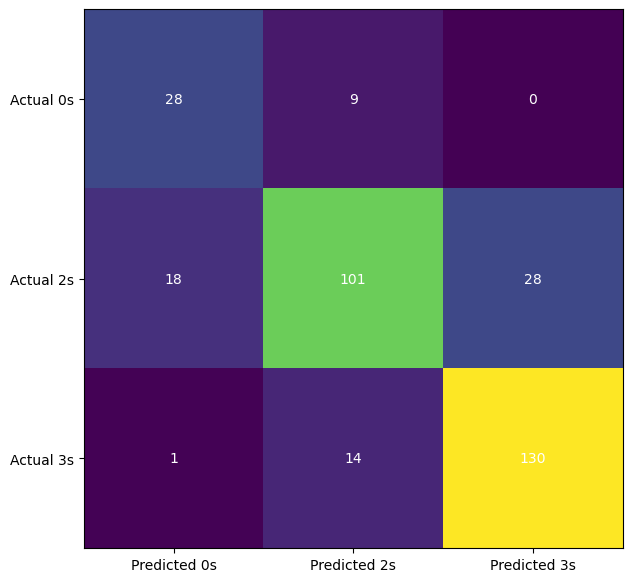

In [104]:
import matplotlib.pyplot as plt 

cm = confusion_matrix(Y_TEST,training_data_prediction)

fig,ax = plt.subplots(figsize=(7,7))
ax.imshow(cm)
ax.xaxis.set(ticks=(0,1,2),ticklabels=('Predicted 0s','Predicted 2s','Predicted 3s'))
ax.yaxis.set(ticks=(0,1,2),ticklabels=('Actual 0s','Actual 2s','Actual 3s'))
for i in range(3): 
    for j in range(3):
        ax.text(j,i,cm[i,j],ha='center',va='center',color='white')
plt.show()

In [105]:
report = classification_report(Y_TEST,training_data_prediction)
print(report)

              precision    recall  f1-score   support

           0       0.60      0.76      0.67        37
           2       0.81      0.69      0.75       147
           3       0.82      0.90      0.86       145

    accuracy                           0.79       329
   macro avg       0.74      0.78      0.76       329
weighted avg       0.79      0.79      0.79       329



# <u>Logistic Regression</u>

In [106]:
from sklearn.linear_model import LogisticRegression 

lr = LogisticRegression(solver='liblinear',random_state=10)
lr.fit(X_TRAIN,Y_TRAIN)

LogisticRegression(random_state=10, solver='liblinear')

In [107]:
lr.classes_

array([0, 2, 3])

In [108]:
lr.intercept_

array([-5.74677728e-06, -1.68690127e-01,  3.91250054e-04])

In [109]:
lr.coef_

array([[ 7.10629709e-03,  2.33000403e-03, -8.18556130e-05,
        -1.13807573e-04,  4.33570746e-04, -2.23524332e-04,
         4.41128070e-04,  6.09409095e-04, -4.49568593e-03,
         1.55557571e-03,  1.48943633e-03,  6.52579066e-04,
        -5.98886528e-04,  1.85230637e-04, -2.31621934e-04,
         5.09010446e-04,  7.24064246e-04, -1.96211517e-04,
         4.08594496e-04,  3.24008899e-03, -6.80789660e-04,
         7.57547838e-06, -9.80390417e-05, -4.23114426e-03,
        -2.06137473e-03,  3.01025949e-04, -3.84405022e-05,
         2.40379609e-05, -2.65645842e-04, -1.95381252e-05,
        -5.65047378e-04,  1.43316047e-04,  8.25962238e-06,
        -1.45286723e-04, -3.91292144e-04, -4.58866874e-04,
         8.30876384e-05,  2.58291117e-03,  8.49880392e-05,
        -5.48617713e-06,  1.06128519e-05,  7.30273863e-04,
         4.10297159e-03,  2.39217694e-05],
       [-6.66040317e-03, -3.19204856e-03,  2.43895563e-05,
        -9.15280693e-02,  2.95231127e-01,  2.20444588e-01,
         4.39

### Prediction on Train Data 

In [110]:
# aaccuracy for prediction on training data 
training_data_prediction = lr.predict(X_TRAIN)
print(training_data_prediction)

[3 0 2 2 2 2 3 3 3 2 3 2 2 3 2 3 3 2 0 3 2 3 0 3 3 2 2 3 3 3 3 2 3 3 2 3 3
 3 3 0 3 2 3 0 2 2 3 2 3 3 0 3 2 3 2 2 3 2 3 2 2 2 3 2 2 3 3 3 3 2 3 3 2 2
 2 2 2 3 3 2 2 3 3 0 2 3 3 3 3 2 2 2 2 2 3 3 3 3 3 3 3 3 2 3 3 2 2 3 3 2 2
 3 2 3 2 3 3 3 3 3 3 3 2 2 0 3 2 3 2 2 2 2 2 3 2 0 3 3 2 3 3 2 3 3 3 3 3 3
 3 2 3 3 3 3 3 2 2 2 2 2 2 2 3 3 3 3 2 2 3 2 2 3 3 3 3 2 3 2 2 0 2 2 3 2 3
 3 2 2 3 2 2 3 2 2 3 2 3 3 3 2 2 3 2 2 2 3 3 3 3 3 2 3 2 3 2 3 2 2 3 3 3 2
 2 3 3 3 0 3 2 0 3 3 2 2 3 2 2 2 2 3 2 0 3 2 3 2 3 3 2 2 2 3 3 3 2 2 2 3 2
 0 3 2 3 2 0 3 2 3 2 3 2 2 3 3 0 3 2 2 2 2 2 2 2 3 3 3 3 2 3 2 3 2 0 3 3 3
 0 2 3 2 3 2 2 2 2 2 2 0 2 3 2 3 3 3 3 3 2 2 2 2 3 2 3 3 2 3 2 2 2 3 3 3 2
 2 2 2 2 2 3 3 3 3 3 2 2 2 3 3 3 3 3 2 3 2 0 2 2 2 2 3 2 0 2 2 2 2 3 2 3 3
 2 2 0 2 2 2 2 3 3 0 3 2 3 3 3 2 2 2 3 2 3 2 2 3 3 3 2 2 2 2 3 2 2 2 2 3 2
 2 2 2 0 3 2 3 3 2 2 3 3 2 3 0 3 2 2 2 3 2 3 3 2 2 2 3 0 0 2 3 3 2 3 2 2 3
 3 3 0 3 3 3 3 3 2 2 3 2 3 3 2 2 2 3 2 0 3 3 2 2 3 2 2 3 2 2 2 2 3 2 2 3 2
 3 2 3 2 2 2 2 3 2 2 2 3 

In [111]:
from sklearn.metrics import accuracy_score 

accuracy = accuracy_score(Y_TRAIN,training_data_prediction)
print(accuracy)

0.8355329949238579


In [112]:
from sklearn.metrics import classification_report,confusion_matrix 

confusion_matrix(Y_TRAIN,training_data_prediction)

array([[ 42,  39,   3],
       [ 10, 372,  69],
       [  0,  41, 409]], dtype=int64)

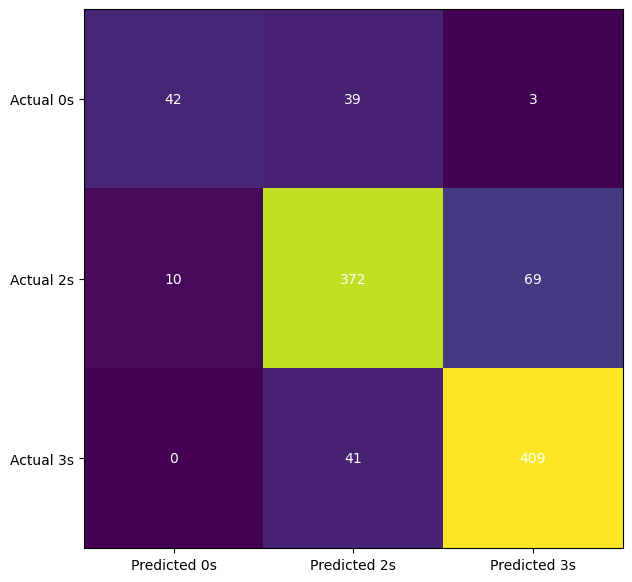

In [113]:
import matplotlib.pyplot as plt 

cm = confusion_matrix(Y_TRAIN,training_data_prediction)

fig,ax = plt.subplots(figsize=(7,7))
ax.imshow(cm)
ax.xaxis.set(ticks=(0,1,2),ticklabels=('Predicted 0s','Predicted 2s','Predicted 3s'))
ax.yaxis.set(ticks=(0,1,2),ticklabels=('Actual 0s','Actual 2s','Actual 3s'))
for i in range(3): 
    for j in range(3):
        ax.text(j,i,cm[i,j],ha='center',va='center',color='white')
plt.show()

In [114]:
report = classification_report(Y_TRAIN,training_data_prediction)
print(report)

              precision    recall  f1-score   support

           0       0.81      0.50      0.62        84
           2       0.82      0.82      0.82       451
           3       0.85      0.91      0.88       450

    accuracy                           0.84       985
   macro avg       0.83      0.74      0.77       985
weighted avg       0.83      0.84      0.83       985



### Testing

In [116]:
# accuracy for prediction on training data
testing_data_prediction = lr.predict(X_TEST)
print(testing_data_prediction)

[3 2 2 3 2 2 3 3 2 3 2 3 2 2 2 3 2 3 0 3 3 3 2 2 2 3 2 2 2 3 0 2 2 2 2 3 0
 3 2 0 3 3 3 2 2 2 2 3 3 3 3 3 0 3 3 3 3 2 2 2 3 3 2 2 3 3 3 2 3 3 3 2 3 2
 3 2 2 3 2 2 3 3 3 3 2 3 2 3 3 2 2 2 3 2 3 2 3 3 2 3 2 2 2 2 3 2 3 0 3 0 3
 2 3 3 2 3 3 2 3 2 0 3 3 3 2 3 2 3 3 2 2 2 3 0 2 3 3 3 2 2 2 3 3 2 3 3 0 3
 2 2 3 3 0 3 2 2 2 2 3 3 2 2 2 3 2 3 2 3 2 3 3 3 3 2 0 2 2 3 3 2 0 2 3 3 3
 3 3 3 3 2 0 2 3 3 3 3 2 0 3 3 3 3 2 3 2 2 0 3 2 3 2 3 3 3 3 2 2 2 3 3 2 3
 2 3 2 2 3 3 2 2 3 3 2 2 3 3 3 3 2 3 3 2 3 2 2 2 2 3 0 2 2 2 3 2 2 2 3 2 3
 3 2 2 3 2 3 2 2 3 0 3 3 3 3 2 2 2 0 2 3 2 3 3 2 2 2 3 2 3 3 3 2 3 3 3 2 2
 2 3 2 2 3 2 2 2 3 2 3 2 3 3 3 2 2 3 2 3 3 2 3 0 3 2 3 3 3 2 3 2 2]


In [117]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(Y_TEST, testing_data_prediction)
print("The Accuracy of Prediction is ", accuracy)

The Accuracy of Prediction is  0.8024316109422492


In [118]:
from sklearn.metrics import classification_report, confusion_matrix

confusion_matrix(Y_TEST, testing_data_prediction)

array([[ 15,  21,   1],
       [  4, 115,  28],
       [  1,  10, 134]], dtype=int64)

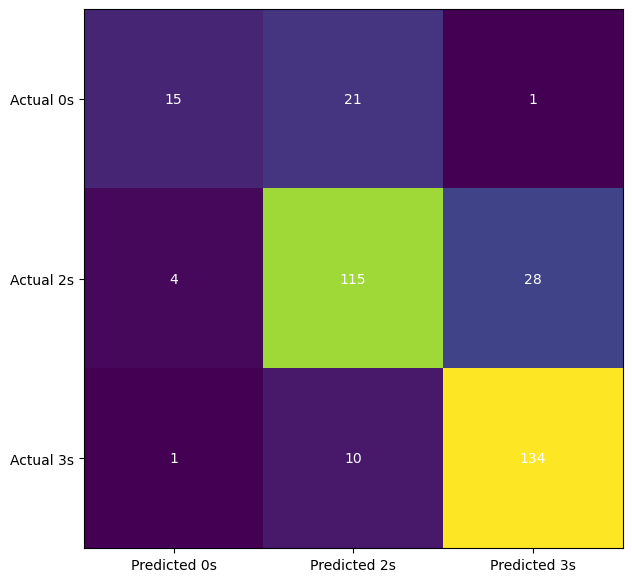

In [120]:
import matplotlib.pyplot as plt 

cm = confusion_matrix(Y_TEST,testing_data_prediction)

fig,ax = plt.subplots(figsize=(7,7))
ax.imshow(cm)
ax.xaxis.set(ticks=(0,1,2),ticklabels=('Predicted 0s','Predicted 2s','Predicted 3s'))
ax.yaxis.set(ticks=(0,1,2),ticklabels=('Actual 0s','Actual 2s','Actual 3s'))
for i in range(3): 
    for j in range(3):
        ax.text(j,i,cm[i,j],ha='center',va='center',color='white')
plt.show()

In [121]:
report = classification_report(Y_TEST,testing_data_prediction)
print(report)

              precision    recall  f1-score   support

           0       0.75      0.41      0.53        37
           2       0.79      0.78      0.78       147
           3       0.82      0.92      0.87       145

    accuracy                           0.80       329
   macro avg       0.79      0.70      0.73       329
weighted avg       0.80      0.80      0.79       329



# <u> SVM Classifier </u>

In [122]:
from sklearn import svm

svm_clf = svm.SVC(kernel='linear')
svm_clf.fit(X_TRAIN,Y_TRAIN)

SVC(kernel='linear')

In [124]:
# accuracy for prediction on training data
training_data_prediction = svm_clf.predict(X_TRAIN)
print(training_data_prediction)

[3 0 2 2 2 2 3 3 3 2 3 2 2 3 2 2 3 2 0 3 2 3 0 3 3 2 2 3 3 3 3 2 3 3 3 3 3
 3 3 0 3 2 3 0 2 2 2 2 3 3 0 3 2 3 2 2 3 2 3 0 2 3 3 2 2 3 3 3 3 2 3 3 2 2
 2 2 2 3 3 2 2 3 3 0 2 3 3 3 3 2 2 2 2 3 2 3 3 3 3 3 3 3 2 3 3 2 2 3 3 2 3
 3 2 3 2 3 3 3 3 3 2 3 2 2 0 3 2 3 2 2 2 2 3 3 2 0 3 3 2 3 3 2 3 3 2 3 3 3
 3 2 3 3 3 3 3 2 2 3 2 2 2 2 3 3 3 3 2 0 3 2 2 3 3 3 2 2 3 2 2 0 2 2 3 2 3
 3 2 2 3 2 3 3 2 2 3 2 3 3 3 2 0 3 2 2 2 3 3 3 3 3 2 3 2 3 2 3 2 2 3 3 3 2
 2 3 3 3 0 3 2 0 2 3 2 2 3 2 2 2 2 3 2 0 3 2 3 0 3 3 2 2 2 3 3 3 2 2 2 3 2
 0 3 2 3 2 0 3 2 3 2 3 2 2 3 3 0 3 2 2 3 2 2 2 2 3 3 3 3 2 3 2 3 2 0 3 3 3
 0 2 2 2 3 2 2 2 2 2 2 0 2 3 2 3 3 3 3 3 2 2 2 2 3 2 3 3 2 3 2 2 2 3 3 3 2
 2 2 2 2 2 3 3 3 3 3 2 2 2 2 3 3 3 3 2 3 0 0 2 2 2 2 3 2 0 2 2 2 2 3 2 3 3
 2 3 0 2 2 2 3 2 3 0 3 2 2 3 3 2 3 2 3 2 3 2 2 3 3 3 2 2 2 2 3 2 2 2 2 3 2
 2 2 2 0 0 2 3 3 2 2 2 3 2 3 0 3 2 2 2 3 2 3 3 2 2 2 3 0 0 2 3 3 2 3 2 2 3
 2 3 0 2 2 3 3 3 2 0 2 2 3 3 2 2 2 3 2 0 3 3 2 2 3 2 2 3 2 2 2 2 3 2 2 3 2
 3 2 2 2 2 2 0 3 2 2 2 3 

In [126]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(Y_TRAIN, training_data_prediction)
print("The Accuracy of Prediction is ", accuracy)

The Accuracy of Prediction is  0.8365482233502538


In [128]:
from sklearn.metrics import classification_report, confusion_matrix

confusion_matrix(Y_TRAIN, training_data_prediction)

array([[ 49,  33,   2],
       [ 18, 372,  61],
       [  2,  45, 403]], dtype=int64)

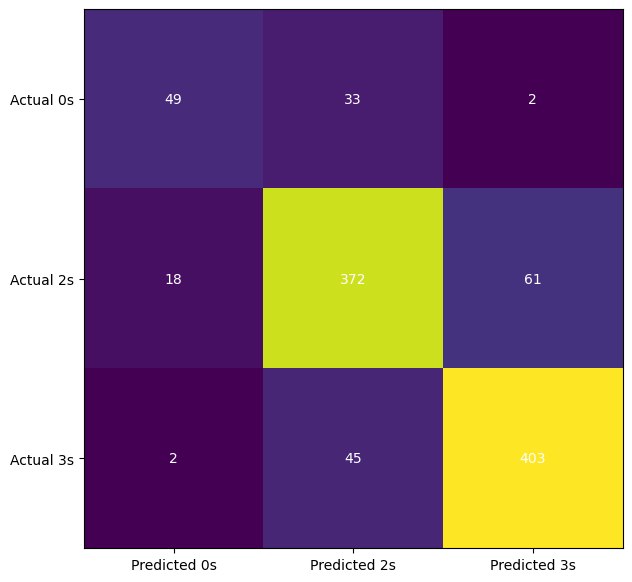

In [129]:
import matplotlib.pyplot as plt 

cm = confusion_matrix(Y_TRAIN,training_data_prediction)

fig,ax = plt.subplots(figsize=(7,7))
ax.imshow(cm)
ax.xaxis.set(ticks=(0,1,2),ticklabels=('Predicted 0s','Predicted 2s','Predicted 3s'))
ax.yaxis.set(ticks=(0,1,2),ticklabels=('Actual 0s','Actual 2s','Actual 3s'))
for i in range(3): 
    for j in range(3):
        ax.text(j,i,cm[i,j],ha='center',va='center',color='white')
plt.show()

In [130]:
report = classification_report(Y_TRAIN,training_data_prediction)
print(report)

              precision    recall  f1-score   support

           0       0.71      0.58      0.64        84
           2       0.83      0.82      0.83       451
           3       0.86      0.90      0.88       450

    accuracy                           0.84       985
   macro avg       0.80      0.77      0.78       985
weighted avg       0.83      0.84      0.83       985



### Testing on Test Data 

In [132]:
# accuracy for prediction on training data
testing_data_prediction = svm_clf.predict(X_TEST)
print(testing_data_prediction)

[3 2 2 3 2 3 2 3 2 3 2 2 3 2 2 3 2 3 0 3 3 2 3 0 2 3 2 2 0 3 0 2 2 2 2 2 0
 3 0 0 3 3 3 2 0 2 2 3 3 3 3 3 0 2 3 3 3 2 2 2 3 3 2 2 3 3 3 2 3 3 3 3 3 2
 3 2 2 3 2 2 3 3 3 3 2 3 2 2 2 2 2 2 3 2 3 3 3 3 2 3 2 2 2 2 3 2 3 2 3 0 3
 2 3 0 0 3 3 2 3 2 0 3 3 3 2 3 2 3 3 2 2 2 3 0 2 3 3 3 2 2 2 3 3 2 3 3 0 2
 2 2 2 3 0 2 3 2 2 2 2 2 2 2 2 3 2 3 2 3 2 3 3 3 3 3 0 2 2 3 3 2 0 2 3 3 2
 3 3 2 3 2 0 2 3 3 3 2 2 0 3 3 3 3 2 3 2 2 0 3 2 3 2 2 3 3 3 2 2 0 3 3 2 3
 2 3 2 2 3 3 0 2 3 2 2 2 3 3 3 3 3 3 3 2 3 2 2 2 2 2 0 2 0 2 3 2 0 2 2 2 3
 3 0 2 3 2 3 2 3 3 0 2 3 2 2 2 2 2 2 2 3 2 3 3 2 2 2 3 2 3 3 3 0 3 2 3 2 2
 2 3 2 2 3 2 2 2 2 2 3 2 3 2 3 2 2 3 2 2 3 2 3 0 3 2 3 3 3 2 3 3 2]


In [133]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(Y_TEST, testing_data_prediction)
print("The Accuracy of Prediction is ", accuracy)

The Accuracy of Prediction is  0.8206686930091185


In [134]:
from sklearn.metrics import classification_report, confusion_matrix

confusion_matrix(Y_TEST, testing_data_prediction)

array([[ 21,  16,   0],
       [  6, 122,  19],
       [  3,  15, 127]], dtype=int64)

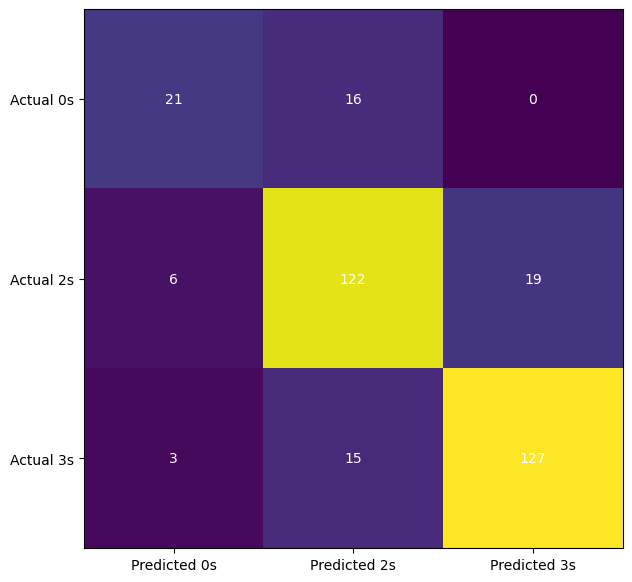

In [135]:
import matplotlib.pyplot as plt 

cm = confusion_matrix(Y_TEST,testing_data_prediction)

fig,ax = plt.subplots(figsize=(7,7))
ax.imshow(cm)
ax.xaxis.set(ticks=(0,1,2),ticklabels=('Predicted 0s','Predicted 2s','Predicted 3s'))
ax.yaxis.set(ticks=(0,1,2),ticklabels=('Actual 0s','Actual 2s','Actual 3s'))
for i in range(3): 
    for j in range(3):
        ax.text(j,i,cm[i,j],ha='center',va='center',color='white')
plt.show()

In [136]:
report = classification_report(Y_TEST,testing_data_prediction)
print(report)

              precision    recall  f1-score   support

           0       0.70      0.57      0.63        37
           2       0.80      0.83      0.81       147
           3       0.87      0.88      0.87       145

    accuracy                           0.82       329
   macro avg       0.79      0.76      0.77       329
weighted avg       0.82      0.82      0.82       329



# <u> Decision Tree Classifier </u>

In [138]:
# from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
# initialize decision tree classifier
dtree = DecisionTreeClassifier(random_state=30)
# train the classifier
dtree.fit(X_TRAIN, Y_TRAIN)

DecisionTreeClassifier(random_state=30)

In [139]:
# accuracy for prediction on training data
training_data_prediction = dtree.predict(X_TRAIN)
print(training_data_prediction)

[3 0 2 2 2 2 3 3 3 2 3 2 2 3 0 2 3 2 0 3 2 3 0 3 3 2 2 3 3 3 2 2 3 3 3 3 3
 3 3 0 3 2 2 0 2 2 3 2 3 3 0 3 2 3 0 2 3 2 3 2 2 3 3 2 2 3 2 2 3 2 2 3 2 2
 3 2 2 3 3 2 2 3 3 0 2 3 3 2 3 2 2 2 2 3 2 3 3 3 3 3 3 3 2 3 3 2 2 3 3 2 3
 3 2 3 2 3 3 3 3 2 2 3 2 2 0 3 2 3 2 2 2 2 3 3 0 0 3 2 2 3 3 2 2 3 3 3 2 3
 3 2 3 3 3 3 3 2 2 2 2 2 2 0 3 3 3 3 2 0 3 3 2 3 2 3 3 2 3 2 2 2 0 2 3 2 3
 3 0 2 3 2 3 3 2 3 3 2 3 3 3 2 2 3 2 2 2 2 3 3 3 3 2 3 2 3 2 3 2 2 3 3 3 2
 0 3 3 3 0 3 2 0 3 3 2 0 3 2 2 0 2 3 2 0 3 2 3 2 3 3 2 2 2 2 3 3 2 2 2 2 2
 0 3 2 2 2 2 3 2 3 2 3 3 2 3 3 0 3 2 2 2 2 2 2 0 3 3 3 3 2 3 0 3 2 0 3 3 3
 0 2 2 2 3 2 2 0 3 0 2 0 2 3 2 3 3 3 3 3 0 2 2 2 2 2 3 3 2 3 2 3 2 3 3 3 2
 0 2 2 2 2 3 3 3 3 3 2 2 2 3 3 3 3 3 2 3 0 0 2 2 3 2 3 2 0 0 2 2 2 3 2 3 3
 2 2 0 2 2 2 2 2 3 0 3 2 3 3 3 3 2 2 2 2 3 2 2 3 3 2 2 3 2 2 2 2 2 3 2 3 2
 2 0 2 0 3 2 3 3 2 2 2 3 0 3 2 2 2 2 2 3 3 3 3 2 2 3 3 0 2 2 3 3 2 3 2 2 3
 2 3 0 2 2 3 3 3 2 2 2 2 3 3 2 2 2 3 2 0 3 3 2 3 3 2 2 3 2 2 2 2 3 2 2 2 2
 3 3 2 2 2 2 0 3 2 2 2 3 

In [140]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(Y_TRAIN, training_data_prediction)
print("The Accuracy of Prediction is ", accuracy)

The Accuracy of Prediction is  1.0


In [141]:
confusion_matrix(Y_TRAIN, training_data_prediction)

array([[ 84,   0,   0],
       [  0, 451,   0],
       [  0,   0, 450]], dtype=int64)

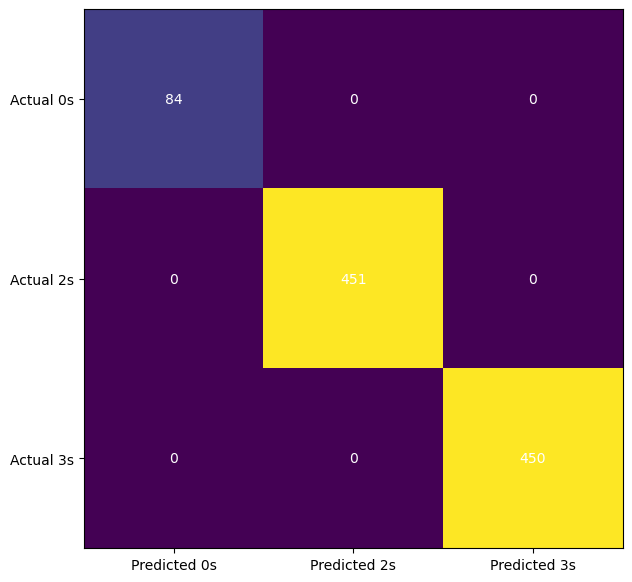

In [142]:
import matplotlib.pyplot as plt 

cm = confusion_matrix(Y_TRAIN,training_data_prediction)

fig,ax = plt.subplots(figsize=(7,7))
ax.imshow(cm)
ax.xaxis.set(ticks=(0,1,2),ticklabels=('Predicted 0s','Predicted 2s','Predicted 3s'))
ax.yaxis.set(ticks=(0,1,2),ticklabels=('Actual 0s','Actual 2s','Actual 3s'))
for i in range(3): 
    for j in range(3):
        ax.text(j,i,cm[i,j],ha='center',va='center',color='white')
plt.show()

In [143]:
report = classification_report(Y_TRAIN,training_data_prediction)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           2       1.00      1.00      1.00       451
           3       1.00      1.00      1.00       450

    accuracy                           1.00       985
   macro avg       1.00      1.00      1.00       985
weighted avg       1.00      1.00      1.00       985



### Prediction on Test Data

In [144]:
# accuracy for prediction on training data
testing_data_prediction = dtree.predict(X_TEST)
print(testing_data_prediction)

[3 2 2 3 2 3 3 3 2 3 2 3 3 2 2 3 3 3 0 3 3 2 2 0 2 3 0 2 2 3 0 2 2 2 2 3 0
 3 0 0 3 3 2 2 3 2 2 2 3 3 3 3 0 2 3 3 3 0 2 2 3 3 2 0 3 3 2 2 3 3 3 2 3 2
 2 2 0 3 2 2 3 3 3 3 2 3 3 2 2 2 2 2 3 2 3 3 2 3 2 3 2 2 2 2 0 2 3 3 3 0 3
 2 3 3 0 3 3 2 3 2 0 2 3 2 0 3 2 3 3 0 3 2 3 0 2 2 3 3 2 2 3 2 3 3 3 2 0 3
 2 2 2 2 0 2 3 2 3 2 2 3 2 2 2 3 0 3 2 3 2 3 3 3 3 3 0 2 0 3 3 2 0 0 3 3 2
 3 3 2 2 2 0 2 3 3 2 3 2 0 3 3 3 3 2 3 2 2 0 3 3 3 3 3 3 3 3 2 2 0 3 3 2 2
 2 2 2 2 3 3 0 0 3 3 2 2 3 3 2 3 3 3 3 2 2 2 2 2 2 3 2 2 2 2 3 2 0 2 3 2 2
 3 2 2 3 0 3 2 2 3 0 3 3 0 2 2 2 2 0 0 3 2 3 3 2 2 2 3 2 3 3 3 3 2 3 3 2 2
 2 3 2 2 3 2 2 2 3 2 3 2 2 3 3 2 2 3 2 2 0 2 3 2 3 2 2 3 3 2 3 2 2]


In [145]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_TEST, testing_data_prediction)
print("The Accuracy of Prediction is ", accuracy)

The Accuracy of Prediction is  0.7416413373860182


In [146]:
confusion_matrix(Y_TEST, testing_data_prediction)

array([[ 23,  14,   0],
       [ 13, 105,  29],
       [  2,  27, 116]], dtype=int64)

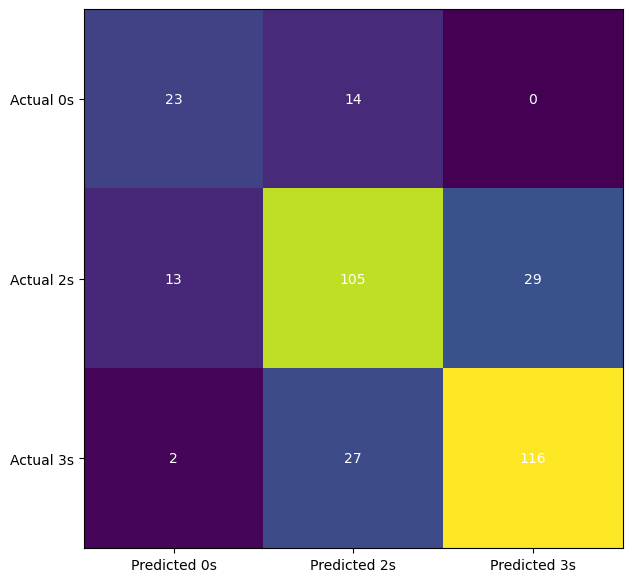

In [147]:
import matplotlib.pyplot as plt 

cm = confusion_matrix(Y_TEST,testing_data_prediction)

fig,ax = plt.subplots(figsize=(7,7))
ax.imshow(cm)
ax.xaxis.set(ticks=(0,1,2),ticklabels=('Predicted 0s','Predicted 2s','Predicted 3s'))
ax.yaxis.set(ticks=(0,1,2),ticklabels=('Actual 0s','Actual 2s','Actual 3s'))
for i in range(3): 
    for j in range(3):
        ax.text(j,i,cm[i,j],ha='center',va='center',color='white')
plt.show()

In [148]:
report = classification_report(Y_TEST,testing_data_prediction)
print(report)

              precision    recall  f1-score   support

           0       0.61      0.62      0.61        37
           2       0.72      0.71      0.72       147
           3       0.80      0.80      0.80       145

    accuracy                           0.74       329
   macro avg       0.71      0.71      0.71       329
weighted avg       0.74      0.74      0.74       329



# <u> Random Forest Classifier </u>

In [150]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=7, random_state=15)
# train the classifier
rf_model.fit(X_TRAIN, Y_TRAIN)

RandomForestClassifier(n_estimators=7, random_state=15)

In [151]:
# accuracy for prediction on training data
training_data_prediction = rf_model.predict(X_TRAIN)
training_data_prediction

array([3, 0, 2, 2, 2, 2, 3, 3, 3, 2, 3, 2, 2, 3, 0, 2, 3, 2, 0, 3, 2, 3,
       0, 3, 3, 2, 2, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 0, 3, 2, 2, 0,
       2, 2, 3, 2, 3, 3, 0, 3, 2, 3, 2, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 3,
       2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 3, 0, 2, 3, 3, 2,
       3, 2, 2, 2, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 2, 3, 3, 2,
       3, 3, 2, 3, 2, 3, 3, 3, 3, 2, 2, 3, 2, 2, 0, 3, 2, 3, 2, 2, 2, 2,
       3, 3, 0, 0, 3, 2, 2, 3, 3, 2, 2, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3,
       3, 2, 2, 2, 2, 2, 2, 0, 3, 3, 3, 3, 2, 0, 3, 3, 2, 3, 2, 3, 3, 2,
       3, 2, 2, 2, 0, 2, 3, 0, 3, 3, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3,
       3, 2, 2, 3, 2, 2, 2, 2, 3, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3,
       3, 2, 0, 3, 3, 3, 0, 3, 2, 0, 3, 3, 2, 0, 3, 2, 2, 0, 2, 3, 2, 0,
       3, 2, 3, 2, 3, 3, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 0, 3, 2, 3, 2,
       2, 3, 2, 3, 2, 3, 3, 2, 3, 3, 0, 3, 2, 2, 2, 2, 2, 2, 0, 3, 3, 3,
       3, 2, 3, 2, 3, 2, 0, 3, 3, 3, 0, 2, 2, 2, 3,

In [152]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_TRAIN, training_data_prediction)
print("The Accuracy of Prediction is ", accuracy)

The Accuracy of Prediction is  0.9878172588832488


In [153]:
confusion_matrix(Y_TRAIN, training_data_prediction)

array([[ 81,   3,   0],
       [  1, 446,   4],
       [  0,   4, 446]], dtype=int64)

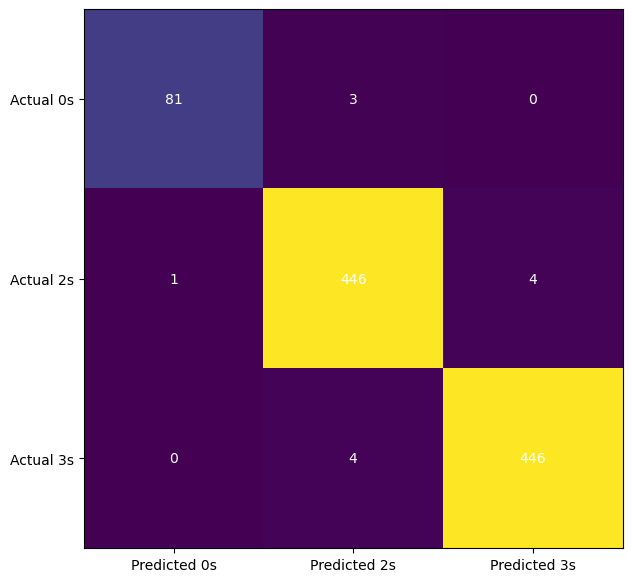

In [154]:
import matplotlib.pyplot as plt 

cm = confusion_matrix(Y_TRAIN,training_data_prediction)

fig,ax = plt.subplots(figsize=(7,7))
ax.imshow(cm)
ax.xaxis.set(ticks=(0,1,2),ticklabels=('Predicted 0s','Predicted 2s','Predicted 3s'))
ax.yaxis.set(ticks=(0,1,2),ticklabels=('Actual 0s','Actual 2s','Actual 3s'))
for i in range(3): 
    for j in range(3):
        ax.text(j,i,cm[i,j],ha='center',va='center',color='white')
plt.show()

In [155]:
report = classification_report(Y_TRAIN,training_data_prediction)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.96      0.98        84
           2       0.98      0.99      0.99       451
           3       0.99      0.99      0.99       450

    accuracy                           0.99       985
   macro avg       0.99      0.98      0.98       985
weighted avg       0.99      0.99      0.99       985



# <u>Prediction on Test Data</u>

In [158]:
testing_data_prediction = rf_model.predict(X_TEST)
print(testing_data_prediction)

[3 2 2 3 3 3 2 3 2 3 2 2 2 2 2 3 2 3 2 3 3 2 3 0 2 3 2 2 2 3 0 2 2 2 2 2 0
 3 2 0 3 3 2 2 3 2 2 3 3 3 3 3 0 2 3 3 2 2 2 2 3 3 2 0 3 3 3 2 3 3 3 3 3 2
 3 2 2 3 2 2 3 3 3 3 2 3 2 2 2 2 2 2 3 2 3 3 3 3 2 3 2 2 3 2 3 2 3 2 3 0 3
 2 3 3 0 3 3 0 3 2 0 3 3 3 2 3 2 3 3 2 2 2 3 0 2 3 3 3 2 2 2 3 3 0 3 3 0 3
 2 2 2 3 0 2 2 2 2 2 3 2 2 2 2 3 2 3 2 3 2 3 3 3 3 3 2 2 2 3 3 2 0 2 3 3 3
 3 3 2 3 2 0 2 3 3 2 3 2 0 3 3 3 3 2 3 2 2 0 3 3 3 3 3 3 3 3 2 2 0 3 3 3 3
 2 3 2 2 3 3 0 0 3 3 2 2 2 3 2 3 3 3 3 2 3 2 2 2 2 2 0 2 2 0 3 2 2 2 2 2 3
 3 2 2 3 2 3 2 2 3 0 3 3 0 2 2 2 2 2 2 3 2 3 3 2 2 2 3 2 3 3 3 3 3 3 3 2 2
 2 3 2 2 3 2 2 2 3 2 3 2 2 3 3 2 2 3 2 2 3 2 3 3 3 2 3 3 3 2 3 2 2]


In [159]:
accuracy = accuracy_score(Y_TEST, testing_data_prediction)
print("The Accuracy of Prediction is ", accuracy)

The Accuracy of Prediction is  0.851063829787234


In [160]:
confusion_matrix(Y_TEST, testing_data_prediction)

array([[ 21,  16,   0],
       [  3, 124,  20],
       [  1,   9, 135]], dtype=int64)

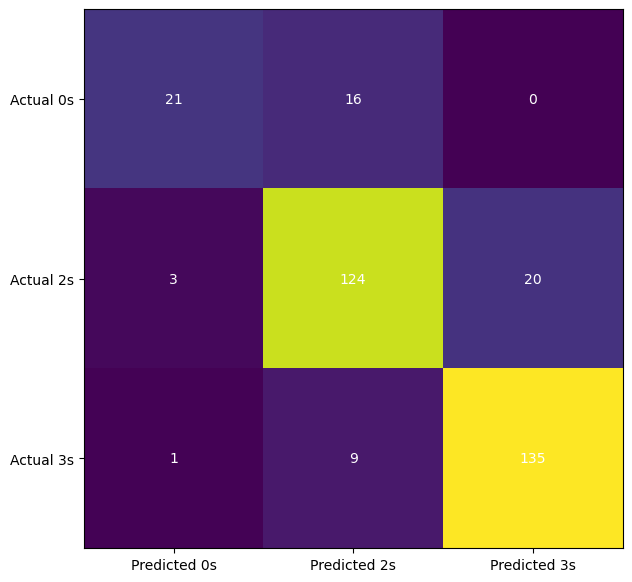

In [161]:
import matplotlib.pyplot as plt 

cm = confusion_matrix(Y_TEST,testing_data_prediction)

fig,ax = plt.subplots(figsize=(7,7))
ax.imshow(cm)
ax.xaxis.set(ticks=(0,1,2),ticklabels=('Predicted 0s','Predicted 2s','Predicted 3s'))
ax.yaxis.set(ticks=(0,1,2),ticklabels=('Actual 0s','Actual 2s','Actual 3s'))
for i in range(3): 
    for j in range(3):
        ax.text(j,i,cm[i,j],ha='center',va='center',color='white')
plt.show()

In [163]:
report = classification_report(Y_TEST,testing_data_prediction)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.57      0.68        37
           2       0.83      0.84      0.84       147
           3       0.87      0.93      0.90       145

    accuracy                           0.85       329
   macro avg       0.85      0.78      0.81       329
weighted avg       0.85      0.85      0.85       329



### OverFitting existed!

## HyperParameter tuning using GridSearchCV 
### GridSearchCV is a scikit-learn function that automates the hyperparameter tuning process
### and helps to find the best hyperparameters for a given machine learning model.

In [166]:
from sklearn.model_selection import GridSearchCV 

# hyperparameter for fine tuning
param_grid = {
    'max_depth': range(1,10,1),
    'min_samples_leaf': range(1,20,2),
    'min_samples_split': range(3,20,2),
    'criterion': ['entropy','gini']
}

# Decision Tree classifier 
tree = DecisionTreeClassifier(random_state=5)

# GridSearchCV 
# CV = Cross Vaidation 
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, 
cv=5, verbose=True)

grid_search.fit(X_TRAIN,Y_TRAIN)

Fitting 5 folds for each of 1620 candidates, totalling 8100 fits


D:\Anaconda\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=5),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 20, 2),
                         'min_samples_split': range(3, 20, 2)},
             verbose=True)

In [167]:
# Best score and estimator
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8568527918781725
DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=3,
                       random_state=5)


In [168]:
# accuracy for prediction on training data
training_data_prediction = grid_search.predict(X_TRAIN)
training_data_prediction

array([3, 0, 2, 2, 2, 2, 3, 3, 3, 2, 3, 2, 2, 3, 2, 3, 3, 2, 0, 3, 2, 3,
       0, 3, 3, 2, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 0, 3, 2, 3, 0,
       2, 2, 3, 2, 3, 3, 0, 3, 2, 3, 2, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 3,
       3, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 3, 3, 2, 2, 3, 3, 0, 3, 3, 3, 3,
       3, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 2,
       3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2, 3, 0, 2, 0, 3, 2, 3, 2, 2, 2, 2,
       3, 3, 2, 0, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3,
       3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 0, 3, 3, 2, 3, 3, 3, 3, 2,
       3, 2, 2, 0, 2, 2, 3, 2, 3, 3, 0, 2, 3, 2, 3, 3, 2, 2, 3, 2, 3, 3,
       3, 2, 2, 3, 2, 2, 2, 2, 3, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3,
       3, 2, 2, 3, 3, 3, 0, 3, 2, 0, 2, 3, 2, 2, 3, 2, 2, 0, 2, 3, 2, 2,
       3, 2, 3, 2, 3, 3, 2, 2, 2, 3, 3, 3, 3, 2, 2, 3, 2, 0, 3, 2, 3, 2,
       3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 0, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3,
       3, 2, 3, 2, 3, 2, 0, 3, 3, 3, 0, 2, 2, 2, 3,

In [169]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(Y_TRAIN, training_data_prediction)
print("The Accuracy of Prediction is ", accuracy)

The Accuracy of Prediction is  0.8913705583756345


In [170]:
confusion_matrix(Y_TRAIN, training_data_prediction)

array([[ 58,  24,   2],
       [  7, 378,  66],
       [  0,   8, 442]], dtype=int64)

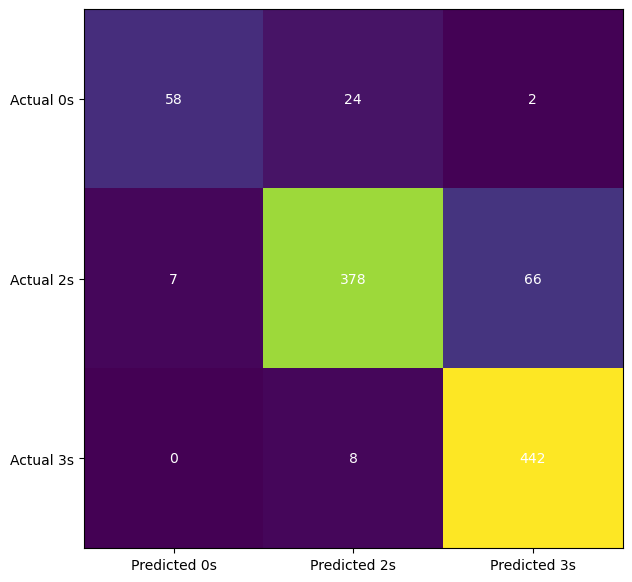

In [171]:
import matplotlib.pyplot as plt 

cm = confusion_matrix(Y_TRAIN,training_data_prediction)

fig,ax = plt.subplots(figsize=(7,7))
ax.imshow(cm)
ax.xaxis.set(ticks=(0,1,2),ticklabels=('Predicted 0s','Predicted 2s','Predicted 3s'))
ax.yaxis.set(ticks=(0,1,2),ticklabels=('Actual 0s','Actual 2s','Actual 3s'))
for i in range(3): 
    for j in range(3):
        ax.text(j,i,cm[i,j],ha='center',va='center',color='white')
plt.show()

In [172]:
report = classification_report(Y_TRAIN, training_data_prediction)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.69      0.78        84
           2       0.92      0.84      0.88       451
           3       0.87      0.98      0.92       450

    accuracy                           0.89       985
   macro avg       0.89      0.84      0.86       985
weighted avg       0.89      0.89      0.89       985



### Testing

In [173]:
# accuracy for prediction on training data
testing_data_prediction = grid_search.predict(X_TEST)
print(testing_data_prediction)

[3 2 2 3 2 3 2 3 2 3 2 3 3 2 2 3 2 3 0 3 3 3 2 0 2 3 2 2 2 3 0 2 2 2 2 2 0
 3 2 0 3 3 2 2 2 2 2 2 3 3 3 3 0 2 3 3 2 2 2 2 3 3 2 0 3 3 3 2 3 3 3 3 3 2
 3 2 0 3 2 2 3 3 3 3 2 3 2 2 3 2 2 2 3 2 3 3 2 3 2 3 2 2 3 2 3 2 3 3 3 0 3
 2 3 3 2 3 3 2 3 2 0 3 3 3 2 3 2 3 3 2 2 2 3 0 2 3 3 3 3 2 3 3 3 3 3 3 0 3
 2 2 3 3 0 2 2 2 2 2 3 3 2 2 2 3 2 3 2 3 2 3 3 3 3 3 2 2 2 3 3 2 0 2 3 3 2
 3 3 2 3 2 0 2 3 3 2 2 2 0 3 3 3 3 2 3 2 2 0 3 3 3 3 3 3 3 3 2 2 2 3 3 2 3
 2 3 2 2 3 3 0 0 3 3 2 2 3 3 2 3 3 3 3 2 3 2 2 2 2 3 2 2 2 2 3 2 2 2 2 2 3
 3 2 2 3 2 3 2 2 3 0 3 3 0 3 2 2 2 0 2 3 2 3 3 2 2 2 3 2 3 3 3 2 3 3 3 2 2
 2 3 2 2 2 2 2 2 3 2 3 2 3 3 3 0 2 3 2 2 3 2 3 2 3 2 2 3 3 2 3 2 2]


In [174]:
accuracy = accuracy_score(Y_TEST, testing_data_prediction)
print("The Accuracy of Prediction is ", accuracy)

The Accuracy of Prediction is  0.7993920972644377


In [175]:
confusion_matrix(Y_TEST, testing_data_prediction)

array([[ 17,  20,   0],
       [  6, 115,  26],
       [  0,  14, 131]], dtype=int64)

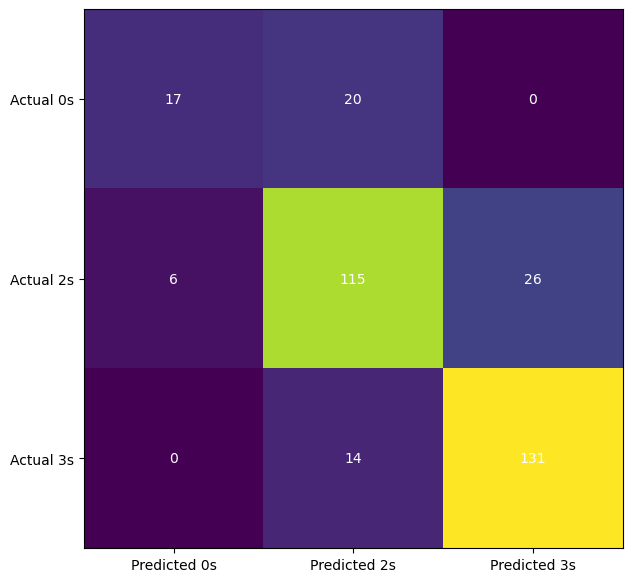

In [176]:
import matplotlib.pyplot as plt 

cm = confusion_matrix(Y_TEST,testing_data_prediction)

fig,ax = plt.subplots(figsize=(7,7))
ax.imshow(cm)
ax.xaxis.set(ticks=(0,1,2),ticklabels=('Predicted 0s','Predicted 2s','Predicted 3s'))
ax.yaxis.set(ticks=(0,1,2),ticklabels=('Actual 0s','Actual 2s','Actual 3s'))
for i in range(3): 
    for j in range(3):
        ax.text(j,i,cm[i,j],ha='center',va='center',color='white')
plt.show()

In [177]:
report = classification_report(Y_TEST,testing_data_prediction)
print(report)

              precision    recall  f1-score   support

           0       0.74      0.46      0.57        37
           2       0.77      0.78      0.78       147
           3       0.83      0.90      0.87       145

    accuracy                           0.80       329
   macro avg       0.78      0.72      0.74       329
weighted avg       0.80      0.80      0.79       329

